# Titanic Survival and Injury Prediction (Multi-Class Classification) Using Python, Scikit-Learn, and Logistic Regression
### Name: Sujan Neupane
### Group: 2
### UNI ID: 2058939

## The Problem Statement

<b> In this Project, I will be implementing Logistic Regression with Python and Scikit-Learn to predict whether a person boarding the titanic will either survive, die or be injured. I have used a [Titanic Titanic - Machine Learning from Disaster Dataset](https://www.kaggle.com/c/titanic/data) that consists of multiple features and one target `Survived`. </b>

## Dataset Description

The original dataset from kaggle had the target column `Survived`. This column only contains two class. I, initially, completed the task using the given target but later realized that this was a binary classification problem as there were only two classes available in target column. 

Therefore, in the data understanding part, I have modified and engineered the dataset. For the passengers who did not survive in titanic, I randomly selected 150 rows and converted the class 0 into class 2 which denotes that those passengers were highly injured but neither were fully safe nor did they die.

The dataset was originally imabalanced among the frequency of the class in the target column. Doing this has also quite balanced the classes in the target column as well. So, converting this dataset from binary classification into a multiclass classification, this dataset will be used to predict whether a passenger survived, did not survive or was injured or not.

In this project, I will use a dataset containing many features like `PassengerId,	Pclass,	Name,	Sex, Embarked	, Age	,SibSp	,Parch	,Ticket	, and Fare` to predict the target that is `Survived`.	


This, updated dataset becomes a `Multiclass Classification` problem because our target column contains three classes: Class `0 means did not survive, 1 means survived and 2 means highly injured`. Therefore, We will first perform exploratory data analysis and visualization, preprocessing and feature engineering and finally use our `Logisitc Regression` model from `Sklearn` to make predictions for our target column. I will create a confusion matrix, measure accuracy and precision for our Logistic Regression model. I will also perform `Hyperparameter Tuning` to further improve our model.


The link to the dataset is given as follows:

https://www.kaggle.com/c/titanic/data

## Importing the Dependencies

The dataset I have used is taken from `Kaggle`. I have used `opendatasets` library to download the dataset directly from kaggle. Since this library is a third party library and not present on google collab, I have manually installed it using pip command.

In [815]:
# Installing our third party library that eases the way we download datasets from kaggle
!pip install opendatasets --quiet

In [816]:
import opendatasets as od
import pandas as pd
import os

In [817]:
# lets import the data visualization tools and libraries
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

# the following are different visualization settings applied for our plots and graphs
sns.set_style('darkgrid')
sns.set_style('darkgrid')
plt.rcParams['font.size'] = 14
plt.rcParams['figure.figsize'] = (20, 10)
plt.rcParams['figure.facecolor'] = '#00000000'

In [818]:
# Importing our core dependencies

import opendatasets as od                            # opendatasets is used to download dataset directly from kaggle
import pandas as pd                                  # Pandas is used for data manipulation
import os                                            # This will simply be used to check the list of files in a given directory
import numpy as np                                   # This will mainly be used for data cleaning and preprocessing
from sklearn.preprocessing import LabelEncoder       # This will be used for encoding categorical columns
from sklearn.linear_model import LogisticRegression  # This is our logistic regression model class
from sklearn.metrics import accuracy_score           # This is used to observe and analyze accuracy of our model
from sklearn.preprocessing import StandardScaler     # This class will be used to scale the features in the preprocessing step
from sklearn.model_selection import train_test_split # This class will be used to randomly split our data into training, valdiation and testing set
from sklearn.metrics import roc_auc_score            # This will be used to calculate the AUC score
from sklearn.metrics import roc_curve                # This will be ued to get false and true positive rates and threshols
from sklearn.metrics import f1_score                 # This will be used to calculate f1 score    
from sklearn.metrics import precision_score          # This will be used to calculate precision of our model
from sklearn.metrics import recall_score             # This will be used to calculate recall score of our model
from sklearn.metrics import confusion_matrix         # This will be used to create the confusion matrix of our model
from sklearn.metrics import classification_report    # This class will be used to get precision, recall etc directly

## Downloading data from Kaggle

In [819]:
# The link to our kaggle dataset
url = 'https://www.kaggle.com/c/titanic/data'

# download method from opendatasets takes in url as a non keyword argument and downloads the respective data from kaggle
od.download(url)

Skipping, found downloaded files in "./titanic" (use force=True to force download)


In [820]:
# Using pandas to load csv files into a pandas dataframes
df = pd.read_csv('titanic/train.csv')

In [821]:
# viewing the available classes in the target column
df[['Survived']].value_counts()

Survived
0           549
1           342
dtype: int64

In [822]:
# randomly selecting 150 rows of the passengers who did not survive and making them into new class 2(Injured)
change = df.sample(150, random_state = 43).index
# and updating our original dataframe such that there will be three classes in our target column
df.loc[change, 'Survived']  = 2

In [823]:
# viewing the available classes in the updated target column
df[['Survived']].value_counts()

Survived
0           458
1           283
2           150
dtype: int64

In [824]:
# printing first five rows of training dataframe
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 1. Data Understanding

### 1.1 Data Characteristics

In [825]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [826]:
df.size

10692

Here, dataframe.size returns the total number of elements present in the dataframe. i.e number of columns * number of rows. This is further proven in the cell below.

In [827]:
891 * 12   # 891 is the number of rows in the dataframe and 12 is the number of columns

10692

In [828]:
# dataframe

df.shape

(891, 12)

we can clearly see that there are 891 rows in our training set and 12 columns respectively.

In [829]:
# lets check the info 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


We can clearly see that there are a total of 891 rows in our training dataframe. However, some columns have less values than the total entries. This means that some of the columns in our training dataframe have Nullvalues. Furthermore, there are multiple columns containing categorical as well as numerical data.

<b> Checking the number of null values in training dataframe </b>

In [830]:
''' here isnull() method return a boolean value if a certain value in a pandas dataframe is null. 
Furthermore, sum() methods calculates the number of True in every columns'''

df.isnull().sum() 

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

We can clearly see that columns `Age`, `Cabin` and `Embarked` have null values. We will later decide to either drop the corresponding rows of the column or impute null values in the data cleaning step.

In [831]:
# lets check how much percentage of values in each columns are Null

(df.isnull().sum() / df.shape[0]) * 100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

We can clearly see that about 77 % of the Cabin column's data is null. This means we will most likely drop the column in later stage at it would make no sense to impute 77 % of the null values in this column. 

In [832]:
# finding the columns in our training dataframe
all_columns = list(df.columns);all_columns

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

<b> Finding the Categorical and Numerical columns in Training Set </b>

In [833]:
# finding the categorical columns 
categorical_cols = df.select_dtypes(include = 'object').columns.to_list()
print("The total number of categorical_cols is: ", len(categorical_cols))
print("And, they are: ")
print(categorical_cols)

The total number of categorical_cols is:  5
And, they are: 
['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']


In [834]:
# finding the numerical columns
numerical_cols = df.select_dtypes(include = 'number').columns.to_list();numerical_cols
print("The total number of numerical_cols is: ", len(numerical_cols))
print("And, they are: ")
print(numerical_cols)

The total number of numerical_cols is:  7
And, they are: 
['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


In [835]:
# checking if there is any duplicate data in the dataframe
df.duplicated().sum()

0

In [836]:
# generates descriptive statistics for corresponding columns
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.654321,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.750678,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,2.000000,3.000000,80.000000,8.000000,6.000000,512.329200


The dataframe.describe() methods generate descriptive statistics for the corresponding columns in the respective dataframe.

Here, Descriptive statistics are simply used to summarize a dataset. They include mean, median, minimum, maximum, first quartile, third quartile etc. They exclude Null or NaN values. This method generates the descriptive statistics for the numerical features of the corresponding dataframe.


From the above cell, We can draw the following conclusions:

  1. The average age is approimately 29 years, whereas the standard deviation for age is 15 years. This means that the majority of people boarding the titanic were in the range of 14 and 44 years old. 
  
  2. In the survived column, there are three unique descrete values (0 for not surviving, and 1 
  for surviving and 2 for injured). The mean for this column is 0.65. Since 0 is the class  of people who did not survive, we can say that 65 % of people who boarded the titanic were either injured or had survived.


In [837]:
# dataframe.unique/ series.unique return a Series containing counts of unique rows in the DataFrame or series
df.Survived.value_counts()/len(df.Survived) * 100

0    51.402918
1    31.762065
2    16.835017
Name: Survived, dtype: float64

In [838]:
df[categorical_cols]  # dataframe only containing categorical columns

,Name,Sex,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,NaN,S
...,...,...,...,...,...
886,"Montvila, Rev. Juozas",male,211536,NaN,S
887,"Graham, Miss. Margaret Edith",female,112053,B42,S
888,"Johnston, Miss. Catherine Helen ""Carrie""",female,W./C. 6607,NaN,S
889,"Behr, Mr. Karl Howell",male,111369,C148,C


<b> Exploring the Name column </b>

In [839]:
# dataframe.unique/ series.unique return a Series containing counts of unique rows in the DataFrame or series
df['Name'].value_counts()

Uruchurtu, Don. Manuel E                  1
Bissette, Miss. Amelia                    1
Honkanen, Miss. Eliina                    1
Slayter, Miss. Hilda Mary                 1
Petroff, Mr. Pastcho ("Pentcho")          1
                                         ..
Sutehall, Mr. Henry Jr                    1
Olsson, Mr. Nils Johan Goransson          1
Ryerson, Miss. Emily Borie                1
Yasbeck, Mr. Antoni                       1
Chibnall, Mrs. (Edith Martha Bowerman)    1
Name: Name, Length: 891, dtype: int64

In [840]:
# series.unique return an array containing unique values in the series 
len(df['Name'].unique())

891

We can clearly see that there are 891 unique names. The names of  every individual boarding the titanic will most likely be unique. This means the data in this column will be of no good at all while training the model because the name of a passenger has no statistical effect on the probability of that person to either survive or die. Hence, we will certainly drop this column in the data cleaning step. However, the title of each passenger could bear some effect on passengers survival. I will engineer this feature in feature engineering/data cleaning step to extract new feature containing the titles of the passengers.

Similarly, a passenger's name will most likely have little bearing on whatever port he or she will board the Titanic from.

<b> Exploring the Sex column </b>

In [841]:
# dataframe.unique/ series.unique return a Series containing counts of unique rows in the DataFrame or series
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

We can clearly see that the majority of passengers boarding the titanic are males. Furthermore, the number of males in the titanic is almost 1.85 times the number of females.

<b> Exploring the Ticket column </b>

In [842]:
# dataframe.unique/ series.unique return a Series containing counts of unique rows in the DataFrame or series

df['Ticket'].value_counts()

1601             7
CA. 2343         7
347082           7
3101295          6
347088           6
                ..
SC/PARIS 2146    1
113786           1
29105            1
315088           1
349257           1
Name: Ticket, Length: 681, dtype: int64

In [843]:
# series.unique return an array containing unique values in the series 
len(df['Ticket'].unique())

681

This column also has many unique values as every passenger will have a unique ticket number. The number of unique tickets is less than the total people in titanic. This could be the case because the company could be handing out offers for ticket holders to bring their siblings, children or parents for free.

Regardless, this column also does not look much useful. We will determine whether to drop or use this column in our data cleaning step.

<b> Exploring Cabin column </b>

In [844]:
# series.unique return an array containing unique values in the series 
df['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [845]:
# getting the number of null values in this column
df.Cabin.isnull().sum()

687

With so many null values, it will perhaps be in our best interest to drop this column altogether. 

<b> Exploring Embarked Column </b>

In [846]:
# dataframe.unique/ series.unique return a Series containing counts of unique rows in the DataFrame or series
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

Here, this column represents the port of Embarkation where	C = Cherbourg, Q = Queenstown, S = Southampton.

while relating Embarked and Survived column, the probability of a person dying or surviving in the titanic could be greatly affected by the port the person has aboarded the titanic from.

<b> Exploring Pclass column </b>

In [847]:
# dataframe.unique/ series.unique return a Series containing counts of unique rows in the DataFrame or series
df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

It looks like more than half of total passengers had a third class ticket. The chances of surviving could go up if the person holds a first class ticket. We will perform further analysis on this topic in the `Data Analysis` step. 

In [848]:
# getting the number of null values in this column
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<b> Summarizing the data characteristics </b>
```
  1. There are 891 rows and 12 columns in our original dataframe.

  2. The three columns, Age, Cabin, and Embarked have 177, 687 and 2 Null values.

  3. The remaining columns donot have Null Values.

  4. There are no duplicate rows in our dataframe.

  5. There are 5 categorical columns and 7 numerical columns in our dataframe.

  6. The columns in the dataframe are PassengerId, Survived, Pclass, Name, Sex,Age, SibSp, Parch, Ticket, and Fare respectively.

  7. In the target column, there are three classes: 0 for not surviving, 1 for surviving and 2 for getting injured
```

### 1.2 Tabular Representation of Data Characteritics

In [849]:
# the descriptions for the corresponding columns have been used as given on kaggle.
# the descriptions for corresponding columns are not generated by me

description = [
               'Passenger ID',
               'Survival, 	0 = No and 1 = Yes',
               'Ticket class, 	1 = 1st, 2 = 2nd, 3 = 3rd',
               'Name of the passenger',
               'Sex',
               'Age of passenger',
               'Number of siblings or spouses aboard the Titanic',
               'Number of parents or children aboard the Titanic',
               'Ticket Number',
               'Passenger fare',
               'Cabin Number',
               'Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton'
]

In [850]:
# the data types for the corresponding columns
corresponding_dtypes = []

In [851]:
for  i in df.columns:
  corresponding_dtypes.append(str(df[i].dtype))

In [852]:
corresponding_dtypes

['int64',
 'int64',
 'int64',
 'object',
 'object',
 'float64',
 'int64',
 'int64',
 'object',
 'float64',
 'object',
 'object']

In [853]:
tabular_data = pd.DataFrame({
    'S.N':[i for i in range(1,13)],
    'Columns':df.columns.to_list(),
    'Description':[description[i-1] for i in range(1,13)],
    'Nullable':['non-null' for i in range(1,13)],
    'Data Type':[corresponding_dtypes[i-1] for i in range(1,13)]
});tabular_data

,S.N,Columns,Description,Nullable,Data Type
0,1,PassengerId,Passenger ID,non-null,int64
1,2,Survived,"Survival, \t0 = No and 1 = Yes",non-null,int64
2,3,Pclass,"Ticket class, \t1 = 1st, 2 = 2nd, 3 = 3rd",non-null,int64
3,4,Name,Name of the passenger,non-null,object
4,5,Sex,Sex,non-null,object
5,6,Age,Age of passenger,non-null,float64
6,7,SibSp,Number of siblings or spouses aboard the Titanic,non-null,int64
7,8,Parch,Number of parents or children aboard the Titanic,non-null,int64
8,9,Ticket,Ticket Number,non-null,object
9,10,Fare,Passenger fare,non-null,float64


In [854]:
# we can also view the characteristics of columns using dataframe.info() method offered by pandas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


The dataframe.info() method simply prints our the information about a DataFrame including the index, dtype and the names of all columns, non-null count, memory usage etc.

## 2. Data Analysis

I will make use of matplotlib and seaborn libraries to plot bargraphs, histograms, boxplots, scatterplots, etc to visualize and analyze the data.

I will perform univariate, bivariate as well as multivariate analysis.

In [855]:
classes = ['Not Survived', 'Survived', 'Injured']

<b> Creating a pivot table </b>

In [856]:
# creating a pivot table
pd.pivot_table(data = df, index = 'Survived', values = ['Age','Fare']).style.background_gradient(cmap='summer_r')

,Age,Fare
Survived,,
0,31.296034,22.520941
1,28.383893,49.711161
2,27.623932,28.740665


From the above pivot table, we can see that younger people are more likely to survive. Similarly, passengers paying more are also more likely to survive as compared with people who pay less. Younger people are also likely to be injured but not killed. This further corresponds with our conclusion that younger people are likely to survive.

In [857]:
# grouping multiple columns
df.groupby(['Pclass'])[['Survived']].mean().sort_values('Survived', ascending = True).reset_index().style.background_gradient(cmap='RdYlGn')

,Pclass,Survived
0,3,0.535642
1,2,0.766304
2,1,0.828704


We can clearly see that passengers with first class ticket have the highest average survival chances. Similarly, passengers with third class ticket seem to have the poorest odds of surviving.

In [858]:
# grouping multiple columns
df.groupby(['Sex'])[['Survived']].mean().sort_values('Survived', ascending = True).reset_index().style.background_gradient(cmap='summer_r')

,Sex,Survived
0,male,0.506066
1,female,0.926752


It looks like the chances of females surviving is almost twice times the chances of males surviving.

In [859]:
# grouping multiple columns
df.groupby(['SibSp'])[['Survived']].mean().sort_values('Survived', ascending = True).reset_index().style.background_gradient(cmap='RdYlGn')

,SibSp,Survived
0,8,0.000000
1,4,0.555556
2,0,0.623355
3,2,0.678571
4,3,0.687500
5,1,0.765550
6,5,0.800000


We can clearly see that the chances of surviving goes down when the passengers had more siblings/parents accompanying them in the titanic.

I will now perform visualization because it is more fun to analyze data using plots than texts and numbers.

<b> For Survived Column </b>

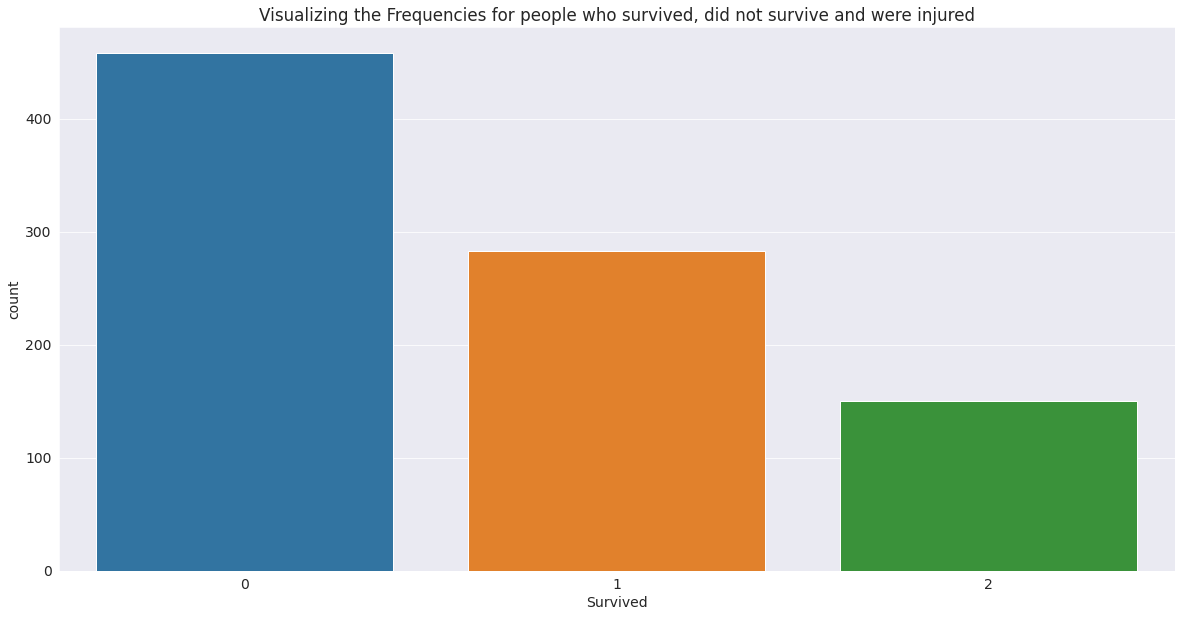

In [860]:
# A countplot is a kind of histogram accross a categorical variable that show the counts of observations in each categorical bin using bars
sns.countplot(x = df.Survived).set(title = 'Visualizing the Frequencies for people who survived, did not survive and were injured');

From the above plot, we can clearly visualize that the number of people who boarded the titanic and survived is twice less than those who did not survive. Similarly, significant number of people were also seriously injured.

I have visualized the same thing using a pie chart below.

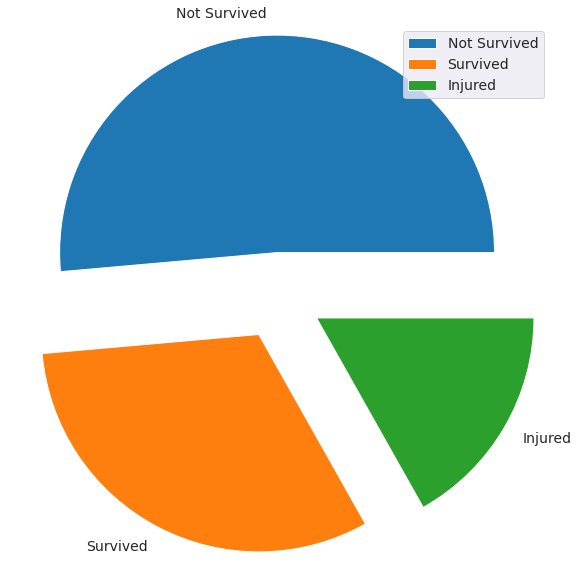

In [861]:
# creating a pie chart
d = [0.2, 0.2,0.2]
plt.pie(list(df['Survived'].value_counts()),labels = ['Not Survived', 'Survived','Injured'], explode = d)
plt.legend();

A pie chart visualizing the passengers who survived and did not survive.

Here, 0 means not survived and 1 means survived. The number of people who did not survive is twice more than the number of people who survived.

<b> Survived vs sex </b>

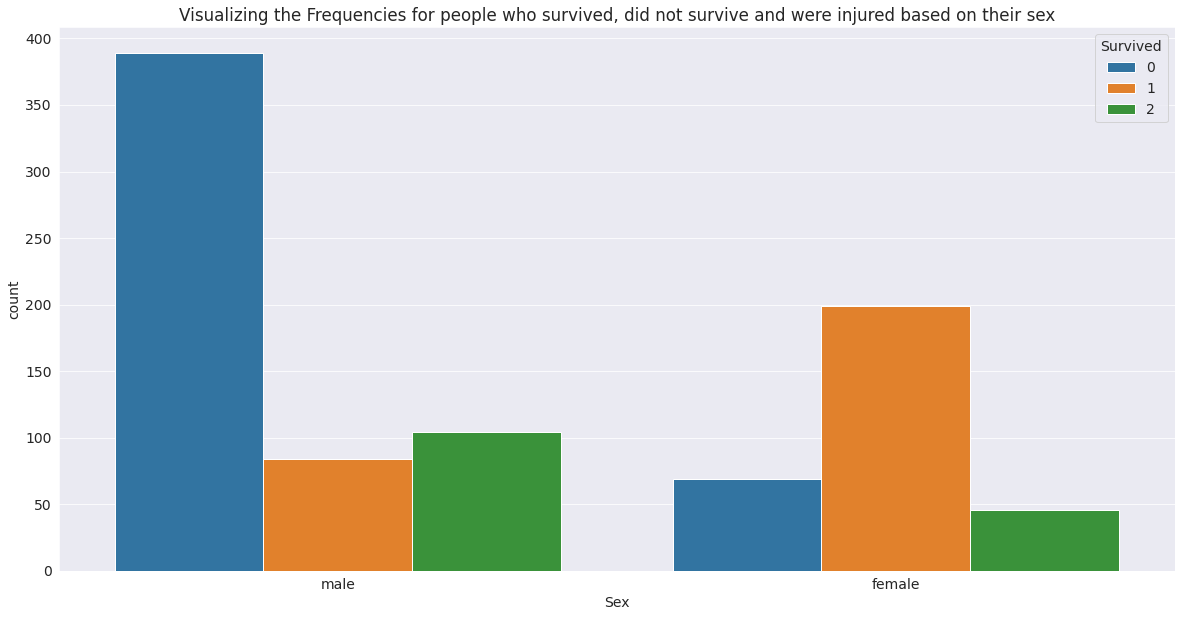

In [862]:
# A countplot is a kind of histogram accross a categorical variable that show the counts of observations in each categorical bin using bars
sns.countplot(x = df['Sex'], hue = df['Survived']).set(title = 'Visualizing the Frequencies for people who survived, did not survive and were injured based on their sex');

We can clearly see that females have significantly higher chances of survival as compared to men.

<b> For Pclass vs Survived column </b>

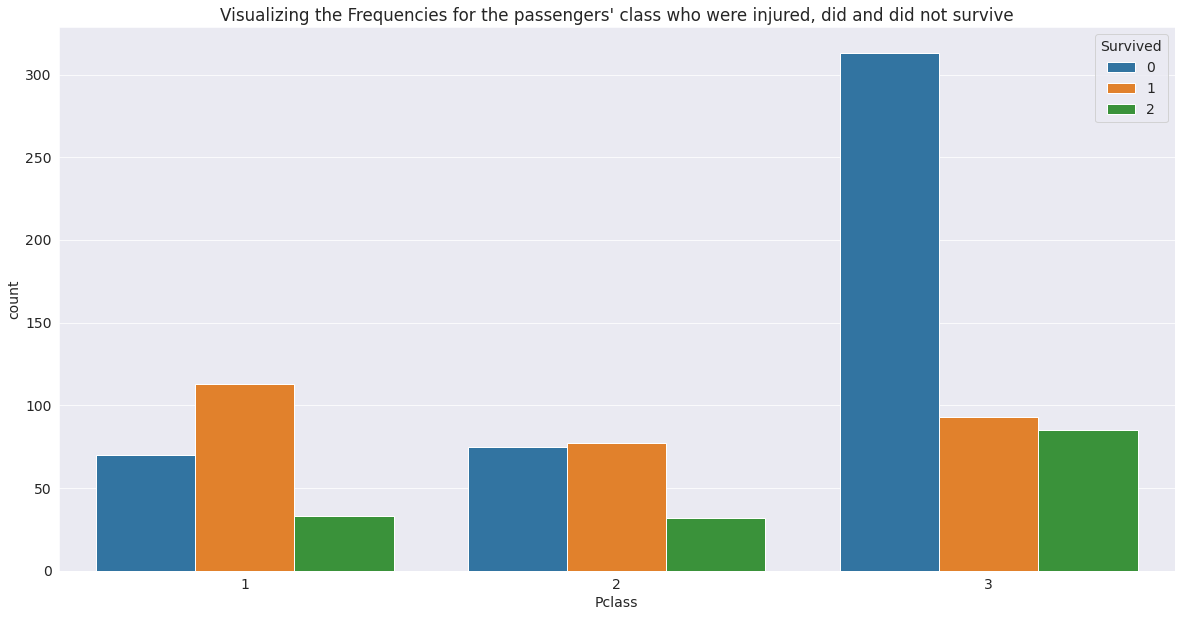

In [863]:
# A countplot is a kind of histogram accross a categorical variable that show the counts of observations in each categorical bin using bars
sns.countplot(x = df['Pclass'], hue = df['Survived']).set(title = 'Visualizing the Frequencies for the passengers\' class who were injured, did and did not survive');

From the plot above, we can clearly draw a conclusion that the chances of a person boarding the titanic significantly increased if the person had a first class ticket. Similarly, we can also see that number of passengers who did not survive also were among those who bought a third class ticket. The number of people who were injured were also among those who had a third class ticket.

This could be the case because the facilities for the passengers with a first class ticket were much more better than the passengers with third and second class ticket.

<b> Embarked vs survival </b>

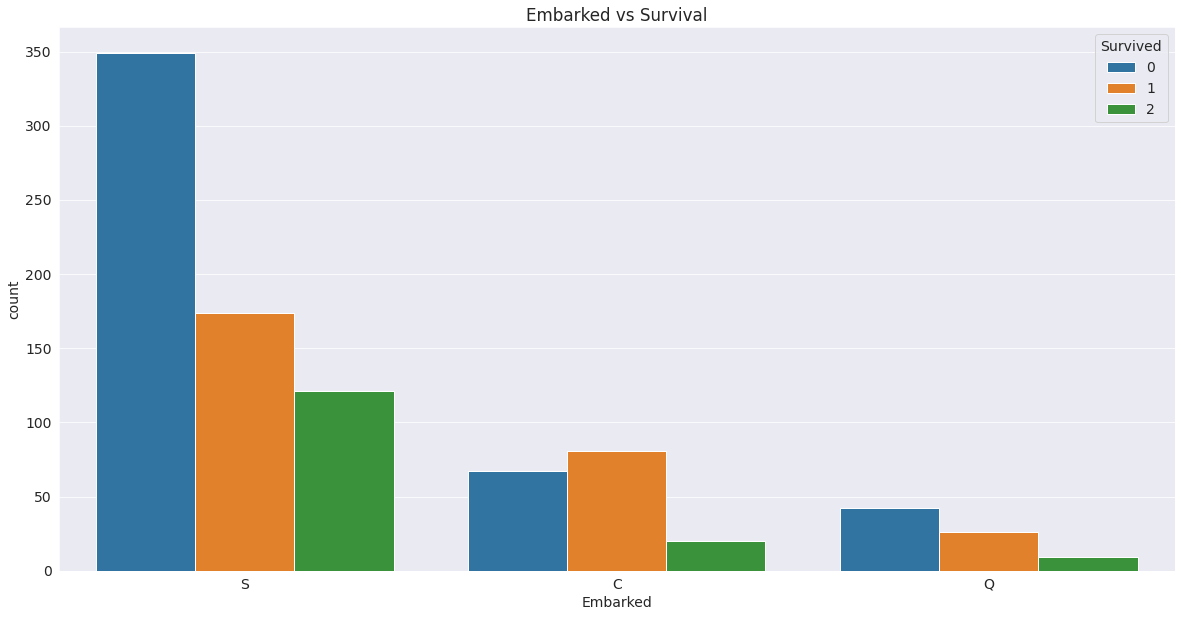

In [864]:
# A countplot is a kind of histogram accross a categorical variable that show the counts of observations in each categorical bin using bars
sns.countplot(x = df.Embarked, hue = df.Survived).set(title = 'Embarked vs Survival');

Here, Embarked column simply refers to the port of Embarkation: C is Cherbourg, Q is Queenstown, and S is Southampton.

The passengers who boarded the titanic from port Southhampton were twice as likely to survive than the passengers who boarded from Cherbourg port. Similarly, the probability of surviving was four times more for passengers who boarded the titanic from Southhampton port as compared to those who boarded from Queenstown port.

Similarly, the people who boarded the titanic from southhampton port were also most injured.

<b> Age column </b>

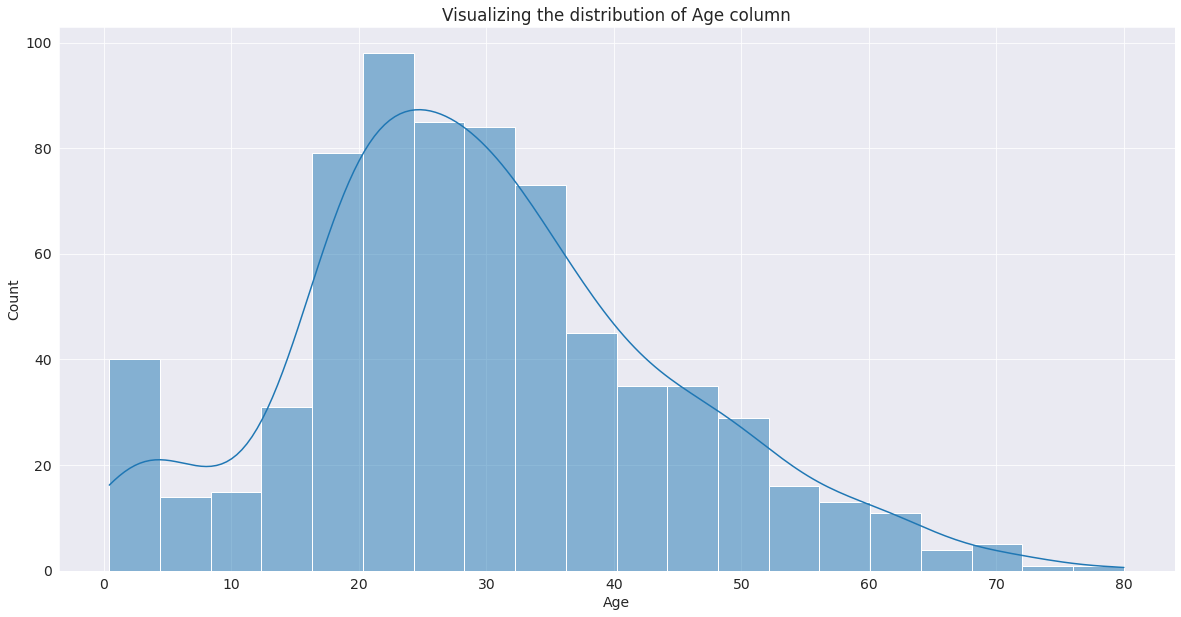

In [865]:
# This method is used to plot univariate or bivariate histograms to show distributions of datasets
sns.histplot(x = 'Age', data = df, kde = True).set(title ='Visualizing the distribution of Age column');

From the histogram  above, we can clearly see that the average age of the passengers boarding the titanic is approximately 29 years. Furthermore, the data in the Age column is almost uniformly distributed. There seem to be outliers at the right extreme of the histogram. We will also verify this by plotting a boxplot.

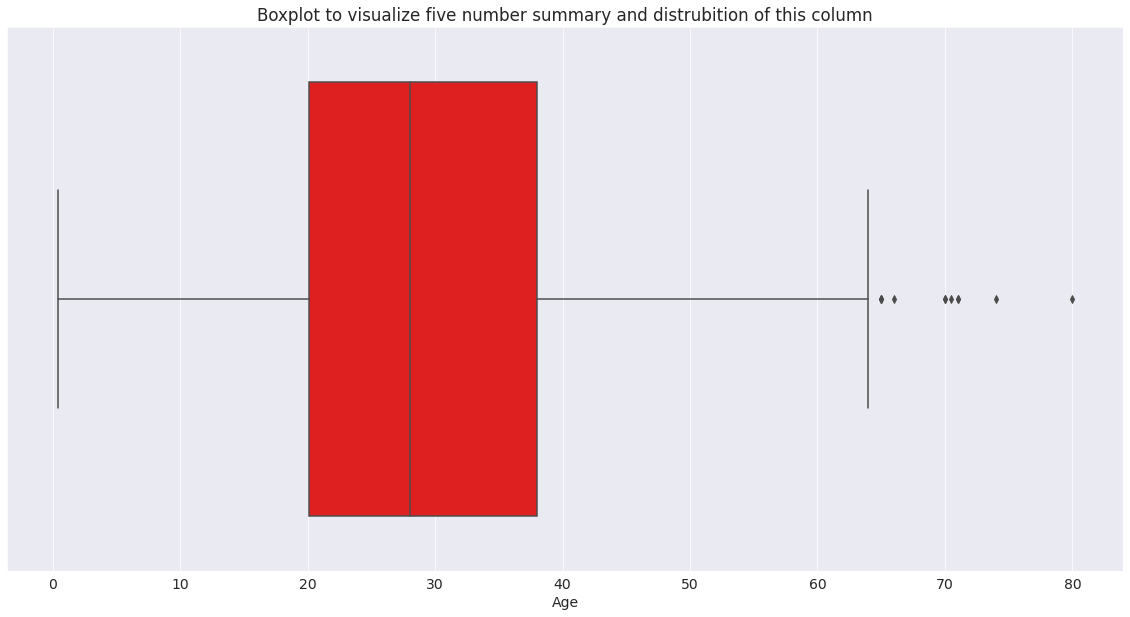

In [866]:
# this is used to plot a boxplot that also helps us to visualize the 5 number summary
sns.boxplot(x = df['Age'], color = 'red').set(title = 'Boxplot to visualize five number summary and distrubition of this column');

From the boxplot above, we can clearly analyze the following observations:

  1. The average passenger boarding the titanic is approximately 29.7 years old.

  2. The median age of boarding passengers is approximately 28 years.

  3. The value of q1 and q3 for this column is approximately 20.2 and 38 years respectively.

  4. The youngest passenger in the titanic is 0.42 years and the oldest passenger is 80 years.

There are also some outliers in this columns. Since there are null values in this column, the best measure of central tendancy to `impute` the null values will be median. We will explain this clearly in the data cleaning step.

<b> Fare Column </b>

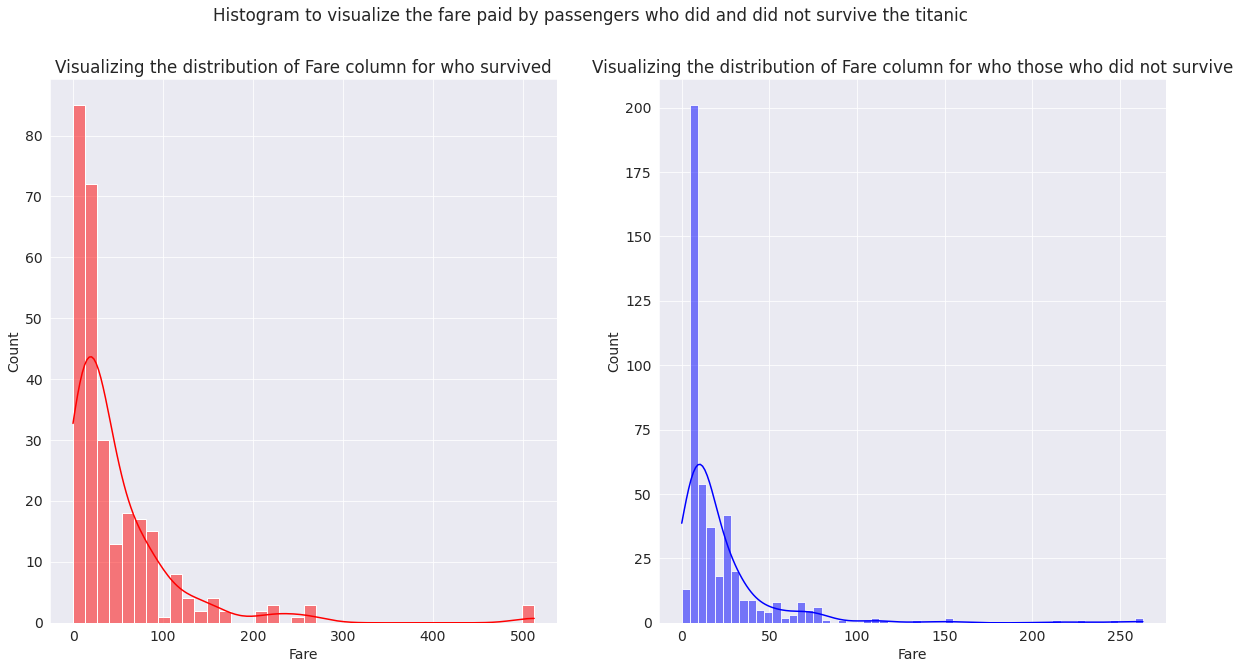

In [867]:
# plotting multiple histograms as subplots

plt.subplot(1,2,1)
sns.histplot(x = 'Fare', data = df[df.Survived == 1], kde = True, color = 'red').set(title ='Visualizing the distribution of Fare column for who survived');

plt.subplot(1,2,2)
sns.histplot(x = 'Fare', data = df[df.Survived == 0], kde = True, color = 'blue').set(title ='Visualizing the distribution of Fare column for who those who did not survive');

#plt.subplots_adjust(wspace = 0.2, hspace = 0.4,top = 1.5)
plt.suptitle("Histogram to visualize the fare paid by passengers who did and did not survive the titanic")
plt.show();

From the two subplots containing the histograms, we can clearly see that the distribution of fare price paid by passengers who did and did not survive is right skewed(positively correlated).

However, one clear thing we can observe is that the passengers who survived in general paid higher fare price as compared to to those who paid less. We will plot a boxplot below to summarize the five number summary and also verify that there are outliers present for this column.

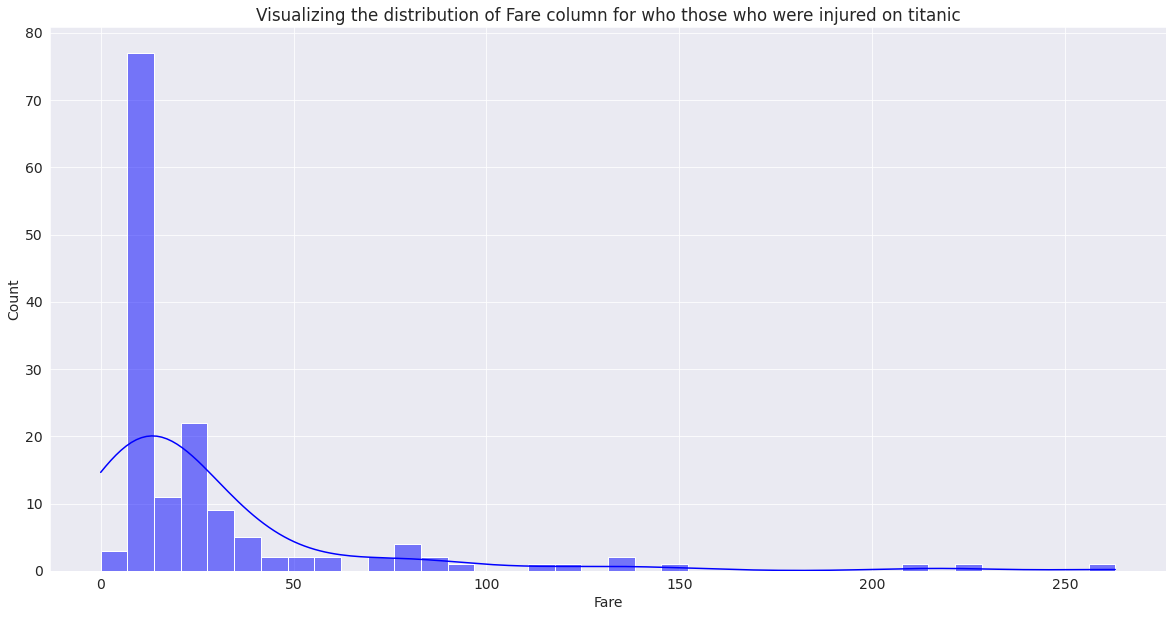

In [868]:
sns.histplot(x = 'Fare', data = df[df.Survived == 2], kde = True, color = 'blue').set(title ='Visualizing the distribution of Fare column for who those who were injured on titanic');

We can clearly see that the people who paid higher fares were less likely to be injured. Similarly, the above plotted histogram is also positively skewed.

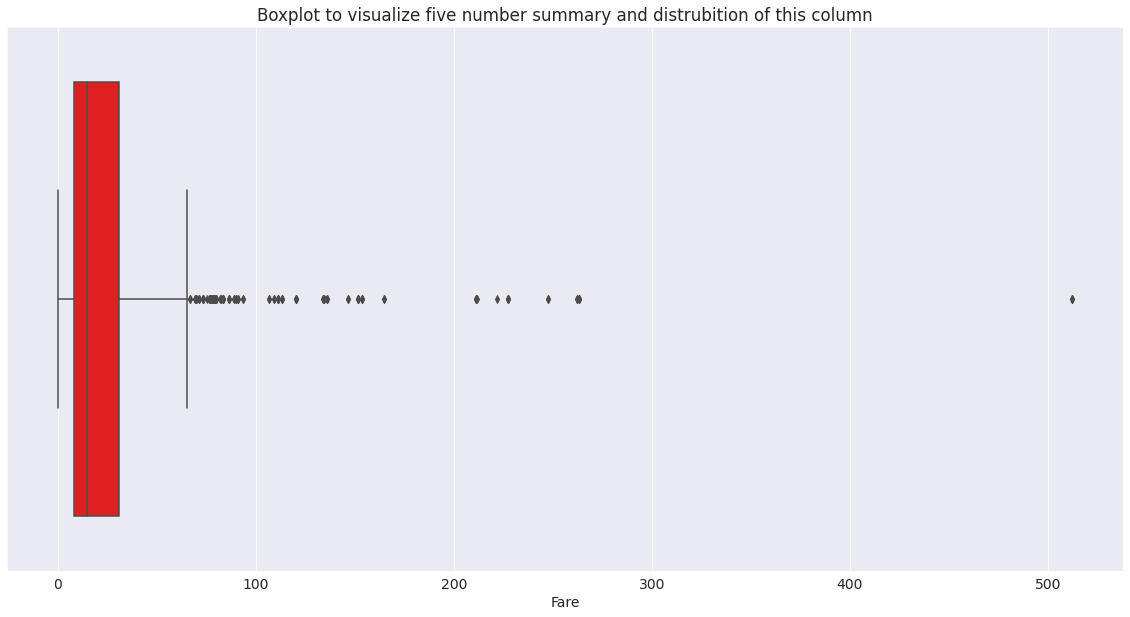

In [869]:
# this is used to plot a boxplot that also helps us to visualize the 5 number summary
sns.boxplot(x = df['Fare'], color = 'red').set(title = 'Boxplot to visualize five number summary and distrubition of this column');

We can clearly see that the values in fare column is strictly positively skewed. Similarly, there are significant number of outliers present as well. Below are the five number summary for this column:

  1. First quartile: 7.91
  2. Third quartile: 71
  3. The minimum: 0
  4. The maximum: 512
  5. The median: 14

<b> Age vs Fare </b>

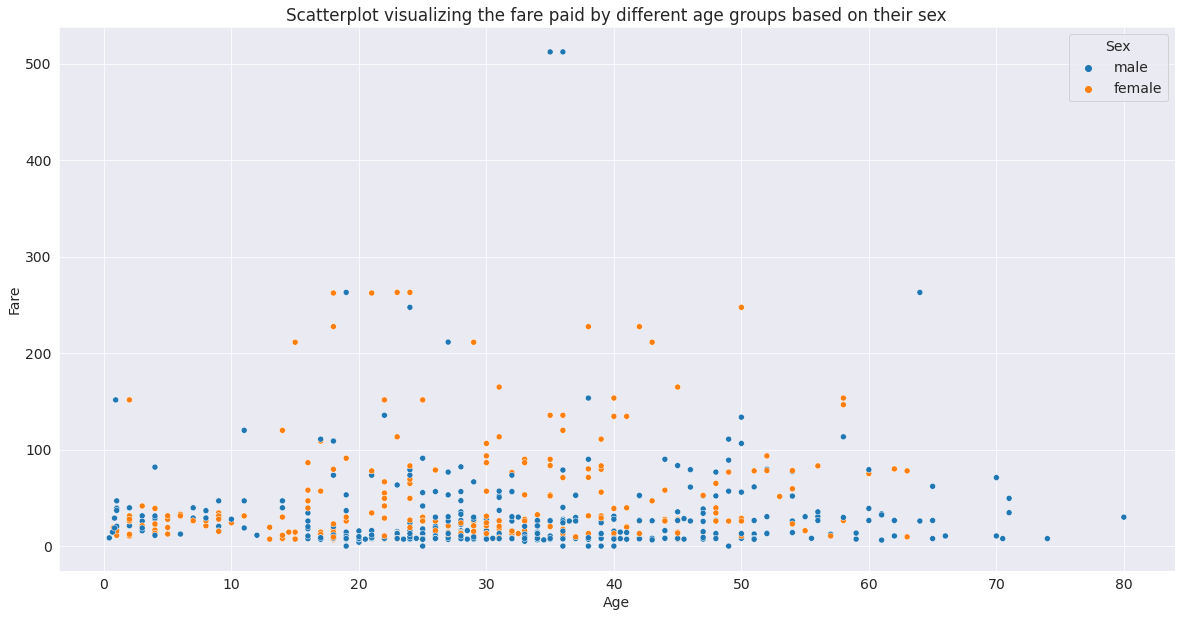

In [870]:
# this is used to plot a scatterplot using seaborn
sns.scatterplot(x = 'Age', y = 'Fare', data = df, hue = 'Sex').set(title = 'Scatterplot visualizing the fare paid by different age groups based on their sex');

From the scatterplot, we can observe that there is a weak positive correlation between age and fare paid by the passengers in titanic.

We can also see that, in case of females, they paid more fair than males in general. Perhaps this is the reason why majority of passengers who survived were females.

<b> Pclass vs Age and Sex vs age </b>

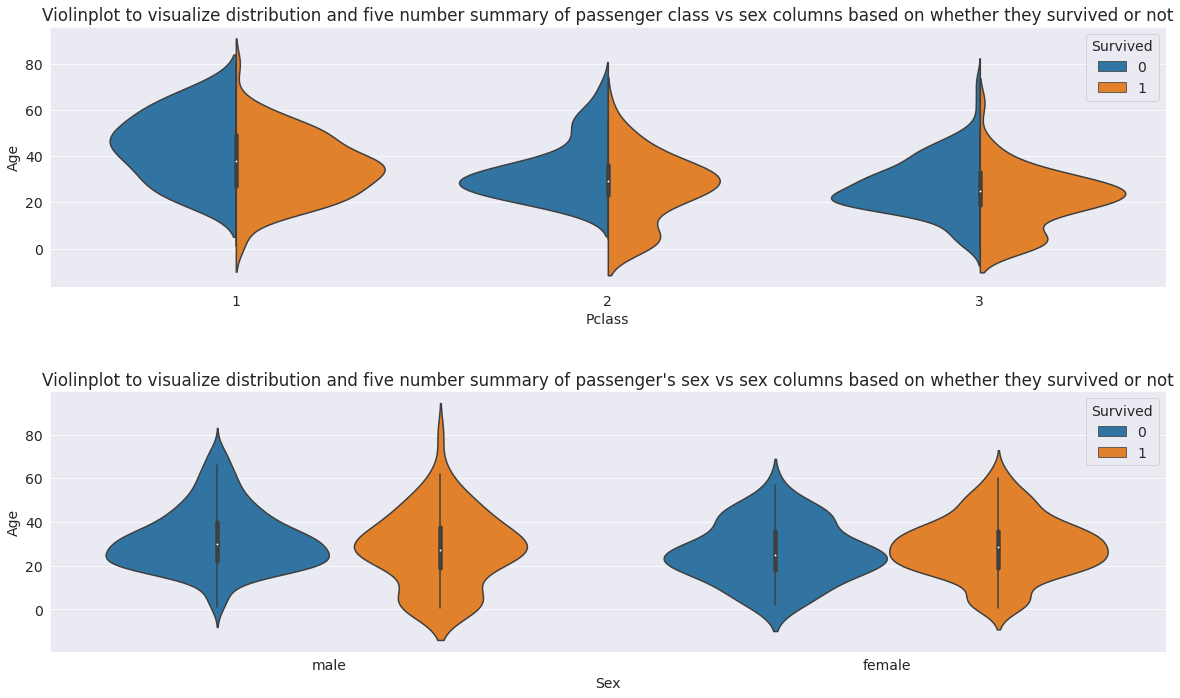

In [871]:
# plotting violinplots as subplots

plt.subplot(3,1,1) # the arguments simply denote that we need 3 rows and 1 column each for plotting 3 plots
plt.title("Violinplot to visualize distribution and five number summary of passenger class vs sex columns based on whether they survived or not")
sns.violinplot(x = "Pclass",y = "Age", hue="Survived", data=df[(df.Survived == 0) | (df.Survived == 1)],split=True)


plt.subplot(3,1,2)
plt.title("Violinplot to visualize distribution and five number summary of passenger's sex vs sex columns based on whether they survived or not")
sns.violinplot(x = "Sex",y = "Age", hue="Survived", data=df[(df.Survived == 0) | (df.Survived == 1)])

plt.subplots_adjust(wspace = 0.2, hspace = 0.4,top = 1.5)

plt.show();

The above plots are called violinplots created by using seaborn library. Violinplot is simply the combination of boxplot and a histogram with a kernel density estimate (KDE).

A boxplot only allows us to visualize the five number summary, and basic distribition of data. However, it doesnot allow us to see variation in the data mainly for multimodel distributions(more than one mode). Here, a violinplot is a very good alternative.

Just like in a boxplot, the central box like structure in a violinplot helps to analyze the descriptive statistcs of features, whereas the density plot is used to understand the distribution of data.

In the first subplot or violinplot, we can clearly see the distribution of age for all passengers(survived and did not survive) regardless of their passenger class is almost symmetrical. For passenger class 2 and 3, in case of the passengers who survived, there is a slight skewness as well. Similarly, we can also analyze the five number summary for all types of passenger tickets. 

In the second violinplot, we can clearly see that median age of both females and males who survived is roughly the same. Furthermore, the distribution of males and females who did not survive is symmetrical. However, for males and females who did survive, their distribution is slightly positively skewed.

<b> Distribution of Age with respect to survivability </b>

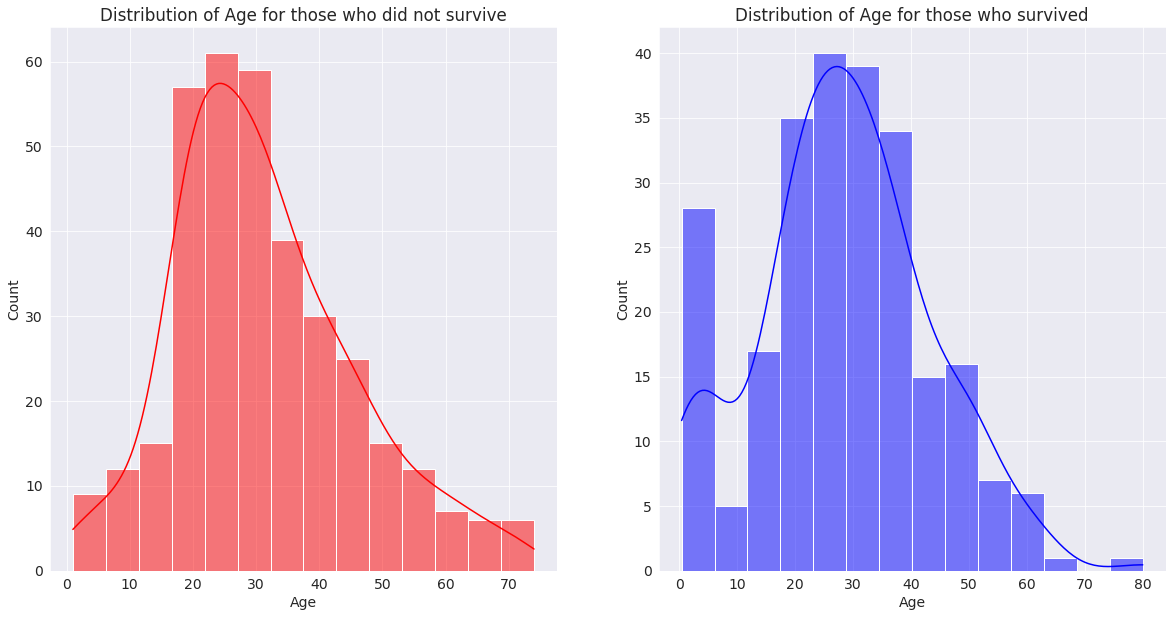

In [872]:
# plotting histograms as subplots

plt.subplot(1,2,1)
sns.histplot(x = df[df.Survived == 0]['Age'], color = 'red', kde = True).set(title = 'Distribution of Age for those who did not survive')
plt.subplot(1,2,2)
sns.histplot(x = df[df.Survived == 1]['Age'], color = 'blue', kde = True).set(title = 'Distribution of Age for those who survived');
# plt.subplots_adjust(wspace = 0.2, hspace = 0.4,top = 1.5)

In the first histogram, we can clearly see the the distribution of age for the passengers boarding the titanic who did not survive is almost normal.

However, the distribution of age for those who survived seems slightly positively skewed. 

<b> Embarked vs other categorical columns </b>

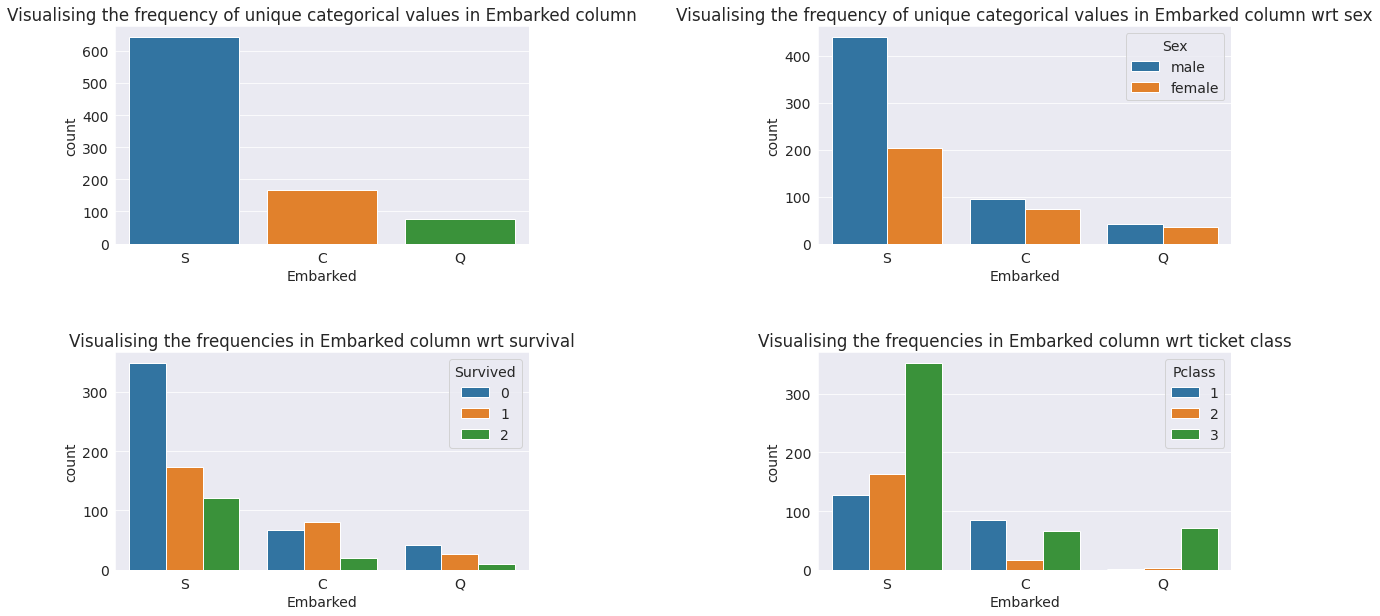

In [873]:
# plotting 4 countplots as subplots

plt.subplot(2,2,1)
sns.countplot(x = 'Embarked',data=df).set(title = 'Visualising the frequency of unique categorical values in Embarked column')

plt.subplot(2,2,2)
sns.countplot(x = 'Embarked',hue='Sex',data=df).set(title = 'Visualising the frequency of unique categorical values in Embarked column wrt sex')

plt.subplot(2,2,3)
sns.countplot(x = 'Embarked',hue='Survived',data=df).set(title = 'Visualising the frequencies in Embarked column wrt survival')

plt.subplot(2,2,4)
sns.countplot(x = 'Embarked',hue='Pclass',data=df).set(title = 'Visualising the frequencies in Embarked column wrt ticket class')

plt.subplots_adjust(wspace=0.7,hspace=0.5)
plt.show()

In the plot above, there are multiple barplots as subplots visualizing the frequencies for unique categorical values in the embarked column with respect to multiple columns like Pclass, Survived, and Sex respectively.

<b> SibSp vs Survived </b>

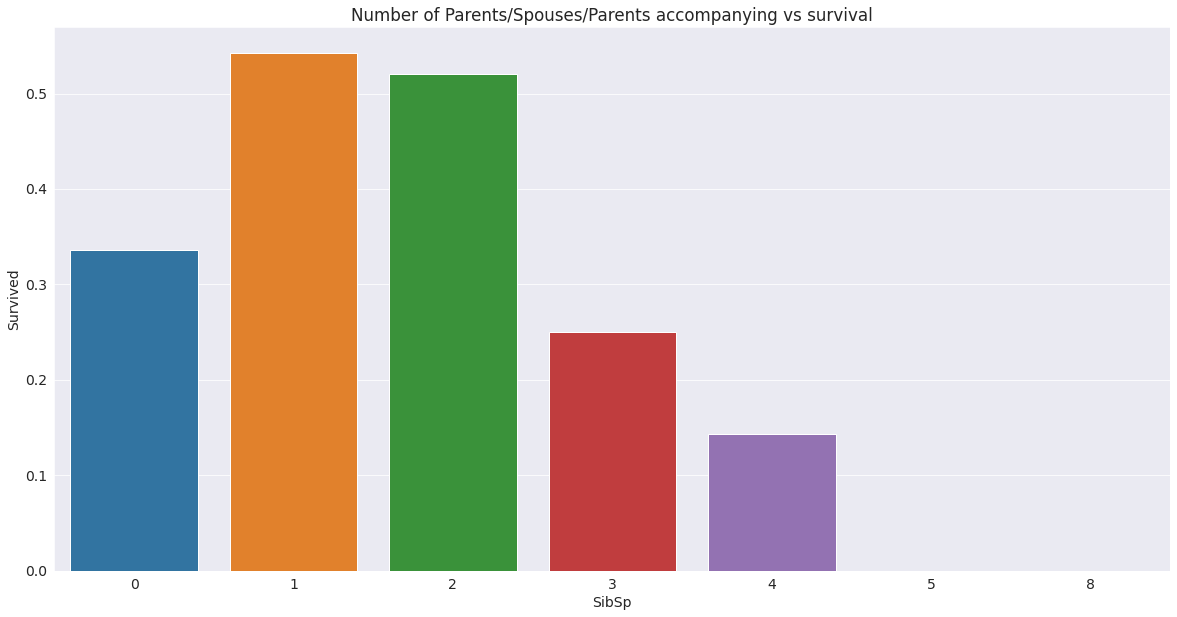

In [874]:
# this is used to plot a barplot using seaborn library
sns.barplot(x = 'SibSp', y = 'Survived', data = df[(df.Survived == 1) | (df.Survived == 0)], ci = False).set(title = 'Number of Parents/Spouses/Parents accompanying vs survival');

Here, SibSp column simply refers to the number of siblings/parents or spouse accompanying a passenger in the titanic. From the above barplot, we can clearly see that the passengers with no accompany has almost 35 % chances of survival. A passenger with 1 accompany has  more than 50 % chances of survival. However, after this, the probability of survival with higher number of accompanies is decreasing. This is probably the case because during the time of disaster, its every man for himself. The passengers with no accompanies can hurry to save themselves without worrying about anyone else. The passengers with 1 accompany can work together to help each other out. However, more than 1 accompanies could be a burden in times of disaster as the passenger would most likely try saving their loved ones and ultimately reduce their chances of survival.

<b> Visualizing the correlation </b>

In [875]:
df1 = df.copy()  # getting the copy of original dataframe
df1[categorical_cols] = df1[categorical_cols].astype(str)

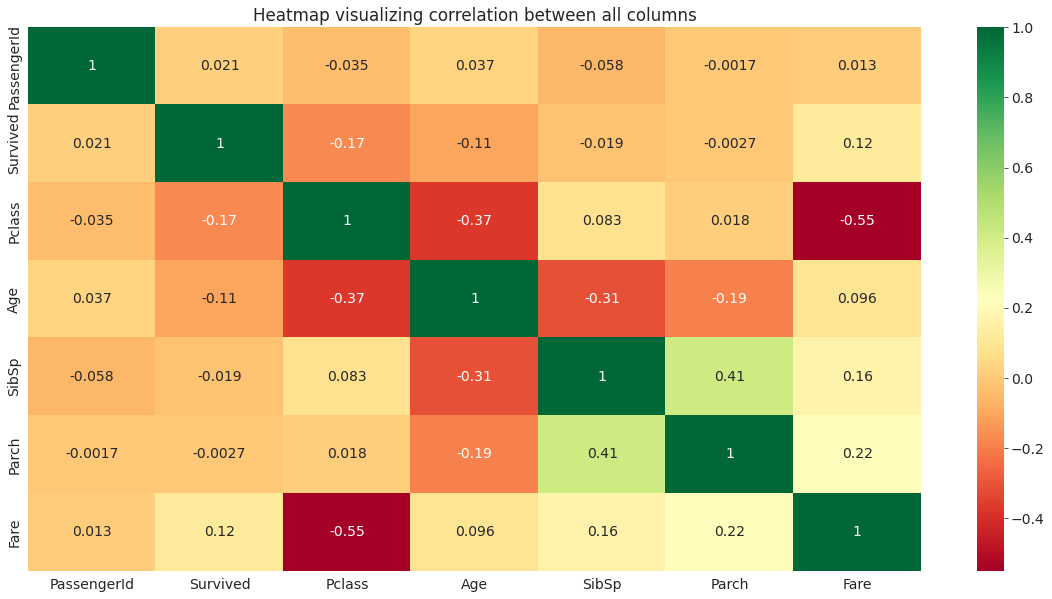

In [876]:
# plotting a heatmap to properly visualize the correlation
sns.heatmap(df1.corr(),cmap='RdYlGn', annot=True).set(title = 'Heatmap visualizing correlation between all columns');

By default, df.corr() method computes the pearson correlation coefficient, and that is being visualized using the heatmap above.

Lets interpret the correlation coefficients:

  1. The Pearson Correlation Coefficients lie in the range of -1 to +1.
  
  2. The magnitude of the correlation coefficients denote how strong the relationship between different features is. If the absolute value of correlation coefficient is greater, the relationship between corresponding features will also be stronger and vice versa. This means, the values 1 and -1 represent a perfect linear relationship such that a change in one feature will result in a consistent change in another feature.

  3. If a correlation coefficient is zero, there is no linear relationship between features.

  4. The sign of the correlation coefficient denotes the direction of relationship of features. This means, if two features are strongly negatively correlated, the rise in one feature will result in consistent decrease in other feature. 


From the above heatmap, we can make the following observations:

  1. The features are not much correlated. 
  2. The strongest positive correlation is between SibSp and Parch column.
  3. The strongest negative correlation is between PClass and Fare column.


The correlation between Fare and Survived is 0.12. This indicates that the passengers who paid more money as fare were more likely to survive. The correlation between Survived and Pclass is -0.17. This also means that the passenger who boarded the titanic with a first class ticket was more likely to survive than the ones with a second and third class tickets

## 3. Data Cleaning

In the data cleaning step, we will mainly perform two operations: `Preprocessing` and `Feature Engineering`.

1. `Preprocessing`: In this substep, we will clean and replace data in categorical columns like sex by performing `Encoding`. We will also remove outliers from numerical columns, encode categorical columns, imputing null values, and finally scale our columns. However, We will only perform feature scaling after our `Feature Selection` step from `Feature Engineering` concludes.

2. `Feature Engineering`: In this substep, We will perform two substeps. They are:
  2.1 `Feature Extraction`: In this substep, we will use the available features to extract new features. 

  2.2 `Feature Selection`: In this substep, we will finalize and select columns for training and model. Not all features will help improve the performance of our model. Some features will wear our model's performance down and increase loss function. Such features are best dropped. Finally, after finalizing our featues, I will perform `feature scaling` from the `preprocessing` stage.

### 3.1 Performing Preprocessing on Columns

#### 3.1.1 Inputing Null Values

In [877]:
# viewing all available columns and their corresponding total null values
dict(df.isnull().sum())

{'Age': 177,
 'Cabin': 687,
 'Embarked': 2,
 'Fare': 0,
 'Name': 0,
 'Parch': 0,
 'PassengerId': 0,
 'Pclass': 0,
 'Sex': 0,
 'SibSp': 0,
 'Survived': 0,
 'Ticket': 0}

In [878]:
# lets get the columns that have missing values in our train_df
columns_with_null_values = [i for i in dict(df.isnull().sum()) if dict(df.isnull().sum())[i] > 0];columns_with_null_values

['Age', 'Cabin', 'Embarked']

In [879]:
for i in columns_with_null_values:
  print("The column "+i+" has {} null values".format(df[i].isnull().sum()))

The column Age has 177 null values
The column Cabin has 687 null values
The column Embarked has 2 null values


<i> We impute null values in respective columns with a best measure of central tendancy. i.e Mean, Mode, and Median </i>

Since, there are Null values, we have two options:
  1. Get rid of the rows containing null values
  2. Fill the null values

If we remove all rows containing atleast 1 null value, we will loose a lot of data. So, the step is not very feasible considering we only have about 891 rows in our training set. The other step is to fill the null values in the corresponding rows of respective columns.

The method of filling null values in a column with a particular number is called `Imputation`

<b> Imputing the Age column </b>

Here, We will be imputing Null values from Age column using the best measure of central tendancy.

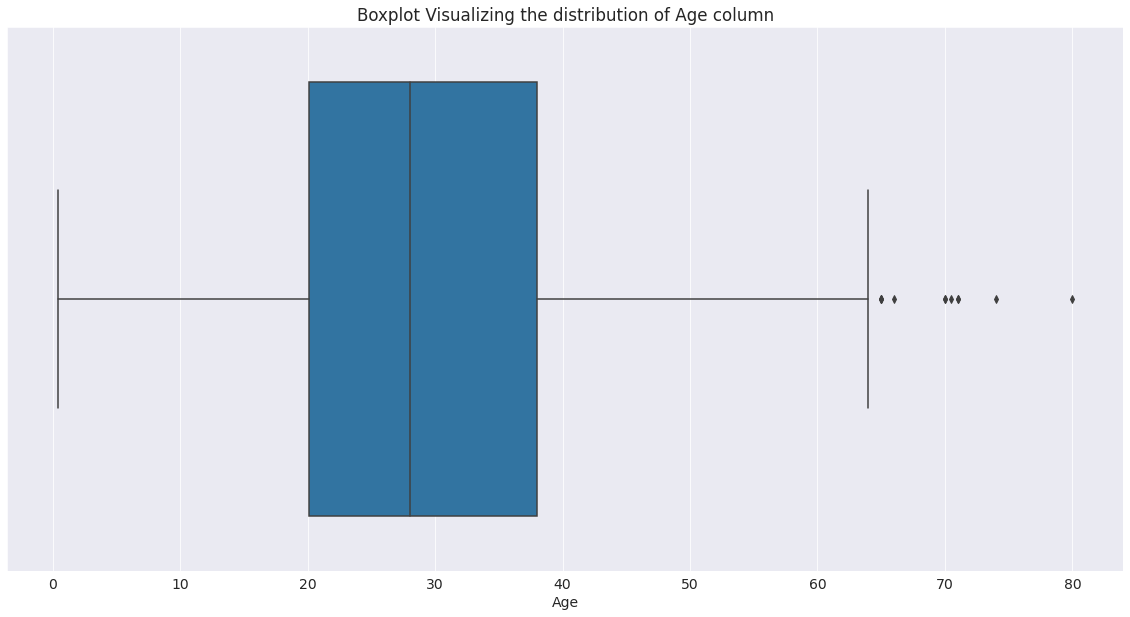

In [880]:
# creating a boxplot using seaborn library
sns.boxplot(x = 'Age', data = df).set(title = 'Boxplot Visualizing the distribution of Age column');

We can clearly see that there are outliers in the Age column.

In [881]:
print("From the boxplot we can make the following observations:\n ")
print(" Q1: ",df['Age'].quantile(0.25))
print(' Q3: ',df['Age'].quantile(0.75))
print(' Q2: ', df['Age'].median())
print(' The minimum: ',df['Age'].min())
print(' The maximum: ', df['Age'].max())

From the boxplot we can make the following observations:
 
 Q1:  20.125
 Q3:  38.0
 Q2:  28.0
 The minimum:  0.42
 The maximum:  80.0


Lets create a histogram to visualize outliers. 

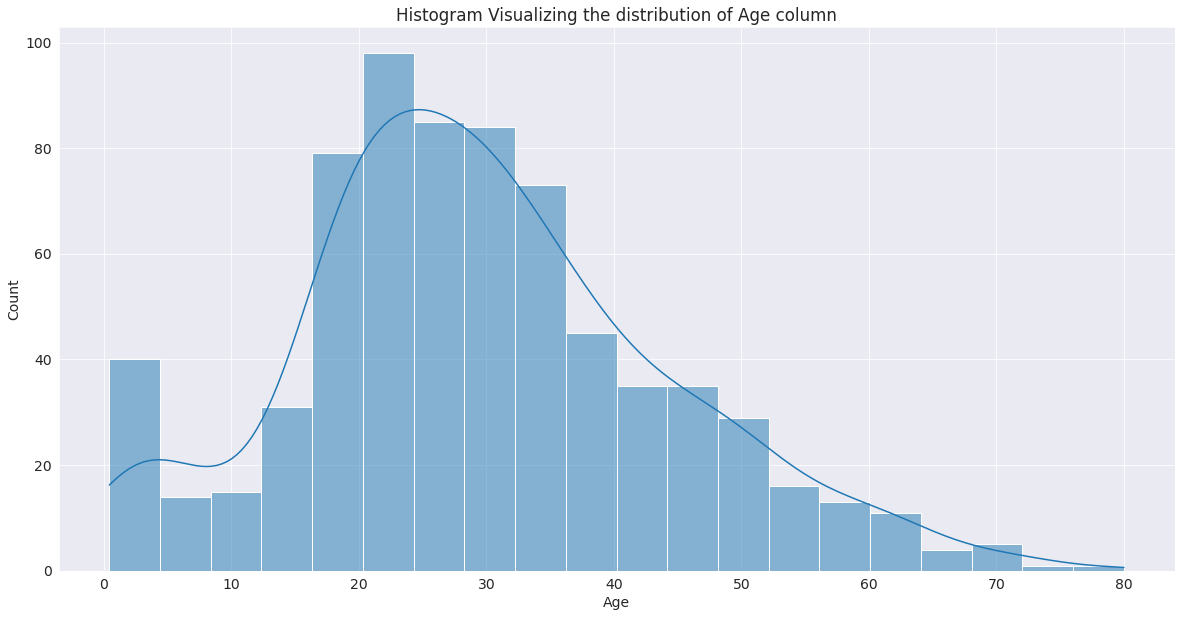

In [882]:
# creating a boxplot using seaborn library
sns.histplot(x = 'Age', data = df, kde = True).set(title = 'Histogram Visualizing the distribution of Age column');

We know, IQR(Inter Quartile Range) = q3 - q1 = 38.0 - 20.125 = 17.875

So, We know that, outlier formula is:

    = [q1 - 1.5 * IQR, q3 + 1.5 * IQR]
    = [20.125 - (1.5 * 17.875), 38 + (1.5 * 17.875)]
    = [-6.6875, 64.8125]


So, all values outside of this range are considered outliers for this column. So, from the above histogram, we can clearly see that not all datapoints fall in the given range which stregthens our conclusion that our `Age` column has some outliers. 

We can clearly see that there are quite some values that are higher than 65 from the histogram above.

Since there are outliers, the best measure of central tendancy to impute null values is median. Since there are outliers, mean would be significantly influenced by outliers. Therefore, we would need to use median to impute null values.

In [883]:
# dataframe.fillna() methods takes in the value to replace the null value in the respective item, whereas inplace = True means to make change in original dataframe
df['Age'].fillna(df['Age'].median(), inplace = True)
df['Age'].isnull().sum()

0

`NOTE: We can also use sklearn.impute.SimpleImputer class and pass parameter strategy = median to impute null values for this column.`

<b> Imputing the null values in Embarked Column </b>

In [884]:
# getting the number of null values for this column
df['Embarked'].isnull().sum()

2

In [885]:
print("For training dataframe")
print(df['Embarked'].value_counts())  # dataframe..value_counts()/ series.value_counts() return a Series containing counts of unique rows in the DataFrame or series

For training dataframe
S    644
C    168
Q     77
Name: Embarked, dtype: int64


This is a column that contains categorical values. Therefore, we will impute null values in this column by using mode.

We can clearly see from the last code cell that there are 644 passengers who boarded the titanic from `Southampton(S)` port, which is highest among other categories. Thus,it can be concluded that the mode for this column is `S`.

So, we will use the mode to impute null values for this column in our dataframe.

In [886]:
# getting the mode for Embarked column
df.Embarked.mode()[0]

'S'

In [887]:
df['Embarked'].fillna('S', inplace = True)
df['Embarked'].isnull().sum()

0

#### 3.1.3 Check and Remove Duplicates

Lets check if there are any duplicates in our data. If there are duplicates in our data, we will use dataframe.drop_duplicates() method to remove them.

In [888]:
# dataframe.duplicated() returns boolean values in a series and sum simply sum the number of duplicates in our data
df.duplicated().sum()

0

There are no duplicates in our data. Therefore, this step can be skipped.

#### 3.1.4 Encoding Categorical Columns

In Scikit-Learn, our machine learning models like `Logistic Regression` can only work with numeric data. This means our models cannot work with string or categorical data. Therefore, It is necessary to convert the categorical data into numerical form. This process is called `Encoding`. 

There are mainly two types of encoding. They are:
  1. One Hot Encoding
  2. Label Encoding

I will be us ing Label Encoding for this dataset. While performing Label Encoding, we will simply replace the unique categorical values in a column from  to (number of unique data in column - 1).

If a column has 3 unique categorical values A, B, anc C, label encoding this column will convert those categorical values into 0,1,and 2 respectively.

In this project, I will make use of `sklearn.preprocessing.LabelEncoder` class to label encode the categorical columns.

In [889]:
# getting the categorical columns
categorical_cols = df.select_dtypes(include = 'object').columns.to_list();categorical_cols

['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

In [890]:
# importing the LabelEncoder class from scikit-learn
# from sklearn.preprocessing import LabelEncoder

# creating object of the LabelEncoder class
encoder = LabelEncoder()

In [891]:
# performing label encoding on selected categorical columns

for i in ['Sex','Embarked']:
  df[i] = encoder.fit_transform(df[i])

In [892]:
df[categorical_cols]

,Name,Sex,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",1,A/5 21171,NaN,2
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,PC 17599,C85,0
2,"Heikkinen, Miss. Laina",0,STON/O2. 3101282,NaN,2
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,113803,C123,2
4,"Allen, Mr. William Henry",1,373450,NaN,2
...,...,...,...,...,...
886,"Montvila, Rev. Juozas",1,211536,NaN,2
887,"Graham, Miss. Margaret Edith",0,112053,B42,2
888,"Johnston, Miss. Catherine Helen ""Carrie""",0,W./C. 6607,NaN,2
889,"Behr, Mr. Karl Howell",1,111369,C148,0


Hence, we have successfully encoded the categorical columns in our dataframe.

### 3.2 Feature Engineering

#### 3.2.1 Feature Extraction

In [893]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,NaN,2
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,B42,2
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,28.0,1,2,W./C. 6607,23.4500,NaN,2
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,C148,0


<b> For Age column </b>

We can clearly see that the `Age` column contains continuous values.In case of Sex, we can easily seperate them as males and females which makes it so easy to make analysis with the target. For Age, the minimum and maximum values are 0.42 and 88. Similarly, there are 88 unique continuous values in Age column. So, it is harder to interpret a persons survivability based on their age. True, we could use a histogram to visualize. But, it would not be the same as plotting a barplot for survivability based on sex.

 So, what if we could engineer the `Age` column into a categorical column. We can convert the continuous values into categorical descrete values by `binning` them into different bins. So, lets try doing so.

I will be binning the age groups into 9 bins such that bin 0 contains age groups 0 to 10 and so on. This way every bin has the age groups of passengers in the ranges of 10 years. 


In [894]:
# creating a new feature with initial values all set to 0
df['Age_Range'] = 0

In [895]:
# binning all age groups from 0 to 10 into category 1
df.loc[(df['Age'] <= 10), 'Age_Range'] = 0

# binning all age groups from 10 to 20 into category 2
df.loc[(df['Age'] > 10) & (df['Age'] <= 20),'Age_Range'] = 1

# binning all age groups from 20 to 30 into category 3
df.loc[(df['Age'] > 20) & (df['Age'] <= 30),'Age_Range'] = 2

# binning all age groups from 30 to 40 into category 4
df.loc[(df['Age'] > 30) & (df['Age'] <= 40),'Age_Range'] = 3

# binning all age groups from 40 to 50 into category 5
df.loc[(df['Age'] > 40) & (df['Age'] <= 50),'Age_Range'] = 4

# binning all age groups from 50 to 60 into category 6
df.loc[(df['Age'] > 50) & (df['Age'] <= 60),'Age_Range'] = 5

# binning all age groups from 60 to 70 into category 7
df.loc[(df['Age'] > 60) & (df['Age'] <= 70),'Age_Range'] = 6

# binning all age groups from 70 to 80 into category 8
df.loc[(df['Age'] > 70) & (df['Age'] <= 80),'Age_Range'] = 7

# binning all age groups from 80 to 90 into category 9
df.loc[df['Age']>80,'Age_Range']=8


# We can also achieve same results using the following set of codes
# df[(df.Age > 0) & (df.Age <= 10)].Age_Range = 0
# df[(df.Age > 10) & (df.Age <= 20)].Age_Range = 1
# df[(df.Age > 20) & (df.Age <= 30)].Age_Range = 2
# df[(df.Age > 30) & (df.Age <= 40)].Age_Range = 3
# df[(df.Age > 40) & (df.Age <= 50)].Age_Range = 4
# df[(df.Age > 50) & (df.Age <= 60)].Age_Range = 5
# df[(df.Age > 60) & (df.Age <= 70)].Age_Range = 6
# df[(df.Age > 70) & (df.Age <= 80)].Age_Range = 7
# df[(df.Age > 80) & (df.Age <= 90)].Age_Range = 8

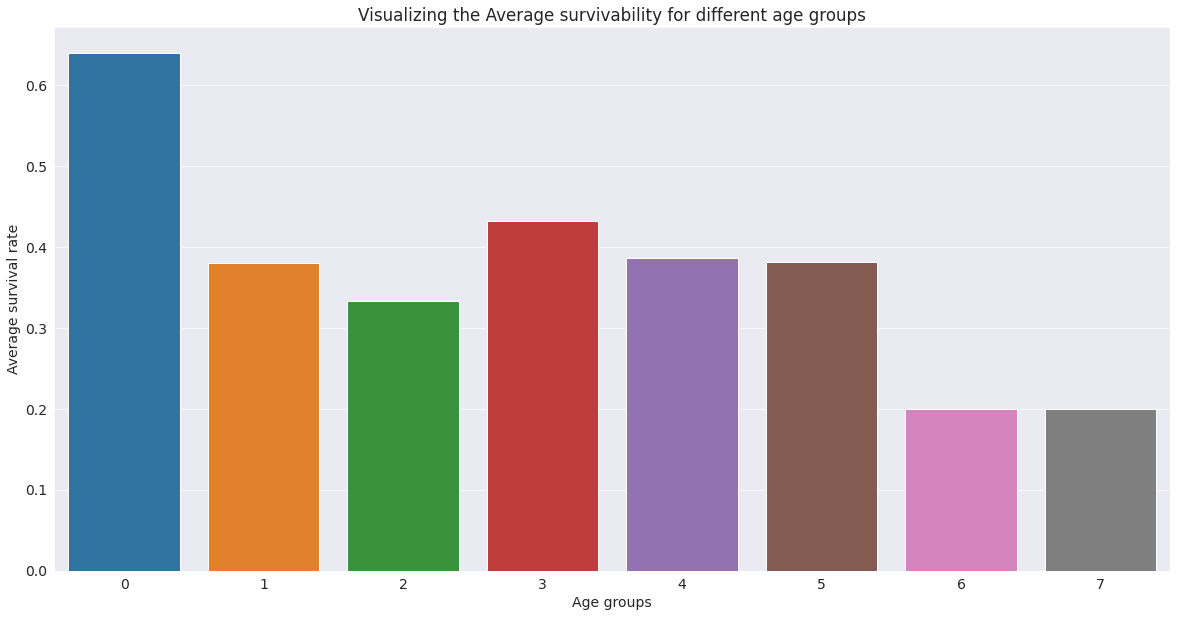

In [896]:
# this is used to plot a barplot using seaborn library
sns.barplot(x = 'Age_Range', y = 'Survived', ci = None, data = df[(df.Survived == 1) | (df.Survived == 0)]).set(title = 'Visualizing the Average survivability for different age groups')
plt.ylabel("Average survival rate")
plt.xlabel("Age groups");

Now, we can properly analyze the survivability for people with different ages.

From the bargraph above, we can clearly see that the passengers belonging to age group 0 had the highest survival rates. This is because the passengers with ages from 0 to 10 years are in this group. Perhaps, the administration in titanic offered safer passage and promoted saving children first during the time of disaster. Furthermore, we can also see that, from the last three bins, the average chances of survival decreases with increase in age.

<b> Fpr SibSp and Parch columns </b>

In our dataset, SibSp column indicates the number of siblings / spouses aboard the Titanic accompanying the passenger. Similarly, Parch column indicates the number of parents / children aboard the Titanic accompanying the passenger.

Since both of these columns represent the number of family members accompanying the passenger in the titanic, we can simply create one additional feature that represents both of these columns. Lets create a new column `Accompanies` that contains the sum of corresponding values of `SibSp` and `Parch` columns.

In [897]:
# combining corresponding values from respective columns
df['Accompanies'] = df['SibSp'] + df['Parch'];df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Range,Accompanies
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,2,2,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,0,3,1
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2,2,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,2,3,1
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,2,3,0


In [898]:
# dataframe..value_counts()/ series.value_counts() return a Series containing counts of unique rows in the DataFrame or series
df['Accompanies'].value_counts()

0     537
1     161
2     102
3      29
5      22
4      15
6      12
10      7
7       6
Name: Accompanies, dtype: int64

We can also generate a new column indicating whether the aboard passenger is alone or not. If the number of accompanies accompanying the passenger is 0, the passenger is said to be alone otherwise not alone.

let 0 be a alone passenger, and 1 be not alone.

In [899]:
# performing the engineering
df['Alone'] = df.Accompanies.apply(lambda x: 1 if x > 0 else 0)

In [900]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Range,Accompanies,Alone
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,2,2,1,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,0,3,1,1
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2,2,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,2,3,1,1
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,2,3,0,0


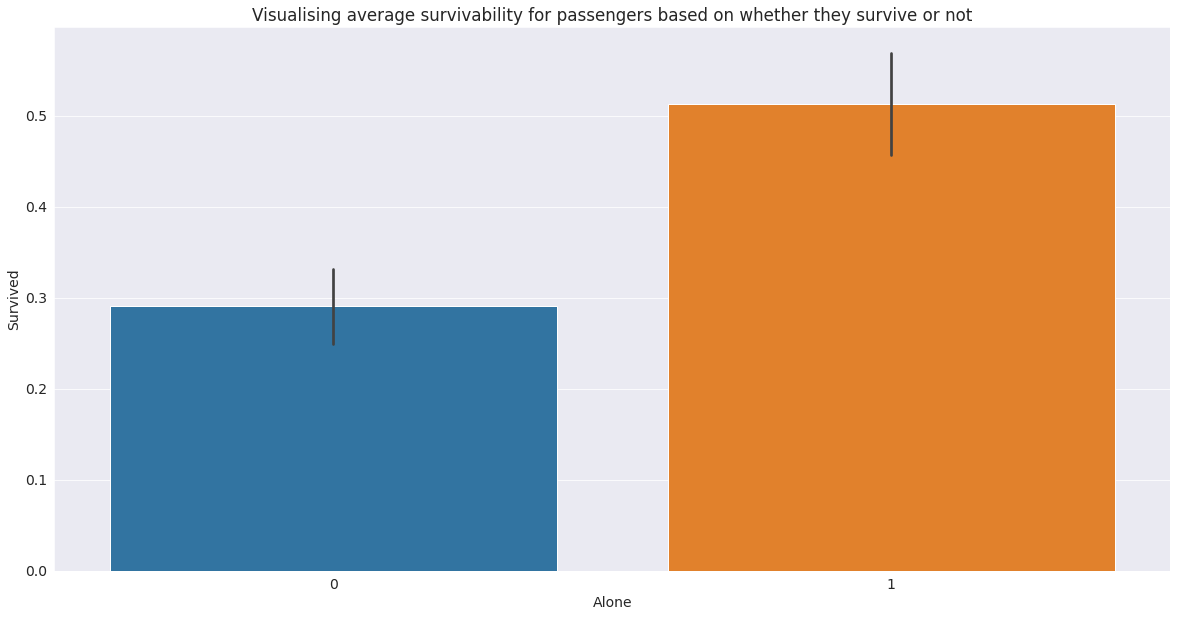

In [901]:
# this is used to plot a barplot using seaborn library
sns.barplot(x = 'Alone', y = 'Survived',data = df[(df.Survived == 1) | (df.Survived == 0)]).set(title = 'Visualising average survivability for passengers based on whether they survive or not');

We can clearly see that, in general, the passengers who are alone are twice less likely to survive as compared to those who aren't alone.

<b> For Name column </b>

In [902]:
df[['Name']]

,Name
0,"Braund, Mr. Owen Harris"
1,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
2,"Heikkinen, Miss. Laina"
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
4,"Allen, Mr. William Henry"
...,...
886,"Montvila, Rev. Juozas"
887,"Graham, Miss. Margaret Edith"
888,"Johnston, Miss. Catherine Helen ""Carrie"""
889,"Behr, Mr. Karl Howell"


In [903]:
# this is the python code to extract the initials of passengers from scratch that i have written all by myself
all_initials = []

for i in df['Name']:
  all_initials.append(i.split(',')[1].split('.')[0].lstrip())

In [904]:
print("There were {} number of unique titles among the passengers in titanic.".format(len(set(all_initials))))
print("And, they are: ")
for i in set(all_initials):
  print(" ",i)

There were 17 number of unique titles among the passengers in titanic.
And, they are: 
  Mme
  Lady
  Mlle
  Miss
  the Countess
  Dr
  Major
  Mrs
  Rev
  Ms
  Sir
  Capt
  Jonkheer
  Don
  Master
  Mr
  Col


Here, the main motivation for undertaking such engineering is that there must definately be some correlation between a person's survivability and title. The initials/titles are assigned to people based on what kind of effect a person has on a society. For masters of field, they are assigned the title `Master`. For people who exert fear and influence in the society, they would probably be called as Don. Similarly, Mr and Miss would be the most common titles in the society.

Since the titles are assigned based on the influence a person can exert in society, a passenger who has a higher ranked title would have most likely paid higher fares. Similarly, that passenegr would also have been provided premium services that a commoner with title `Mr` wouldn't be offered.

Hence, titles like `Lady`, `Master`, and `Sir` would definately have had higher chances of survival.

In [905]:
# creating Initials feature and performing label encoding
df['Initials'] = all_initials  

In [906]:
# converting categorical values into numbers
df['Initials'] = encoder.fit_transform(df['Initials'])

#### 3.2.2 Feature Selection

In [907]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Range,Accompanies,Alone,Initials
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,2,2,1,1,11
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,0,3,1,1,12
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2,2,0,0,8
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,2,3,1,1,12
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,2,3,0,0,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,NaN,2,2,0,0,14
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,B42,2,1,0,0,8
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,28.0,1,2,W./C. 6607,23.4500,NaN,2,2,3,1,8
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,C148,0,2,0,0,11


The `passengerId` column doesnot make any sense as every passenger boarding the titanic will have a unique value. Thus, it is best we drop this column.

Similarly, we can also drop the following columns as they will not help our model improve performance:

  1. Name
  2. Ticket
  3. Cabin

In [908]:
df['Cabin'].isnull().sum()  # getting the number of null values in this column

687

In [909]:
len(df['Ticket'].unique())  # getting the length of list containing unique values of this column

681

Almost every passengers will have a unique name. Similarly, the Cabin column has majority of values Null. And, Ticket column has 681 unique values as every passenger will have a unique ticket id. So, because of these reasons, it is best that we drop these columns 

In [910]:
# dropping the columns
df.drop(columns = ['Cabin','Name','Ticket', 'PassengerId'], inplace = True)

Since we have also extracted new features from `Age`,`SibSp` and `Parch` column, it is best if we drop these columns as they are of no use now.

In [911]:
# dropping the columns
df.drop(columns = ['SibSp','Parch','Age'], inplace = True)

In this step, I will be selecting features that are best useful while training our model. I will make use of Pearson correlation coefficient to select best features.

Let us consider two features A and B. Let T be target. Feature A is strongly positively correlated with feature B. This means, when A rises, B also consistently rises. Let us consider that feature A is strongly negatively correlated with the target T, and the feature B is also be strongly negatively correlated with the target T. In this case, it is best if we drop one of the two columns because they have same characteristics with each other as well as with target. In this case, these two columns are identical and may act similar to duplicates. So, it will be best if we drop one of the columns.

I will drop the column that is less strongly correlated with target than the other column.

In [912]:
# rearranging the target column to the end of the dataframe
target = df['Survived']
df.drop('Survived', axis = 1, inplace = True);df['Survived'] = target
df

,Pclass,Sex,Fare,Embarked,Age_Range,Accompanies,Alone,Initials,Survived
0,3,1,7.2500,2,2,1,1,11,0
1,1,0,71.2833,0,3,1,1,12,1
2,3,0,7.9250,2,2,0,0,8,1
3,1,0,53.1000,2,3,1,1,12,1
4,3,1,8.0500,2,3,0,0,11,0
...,...,...,...,...,...,...,...,...,...
886,2,1,13.0000,2,2,0,0,14,2
887,1,0,30.0000,2,1,0,0,8,1
888,3,0,23.4500,2,2,3,1,8,0
889,1,1,30.0000,0,2,0,0,11,1


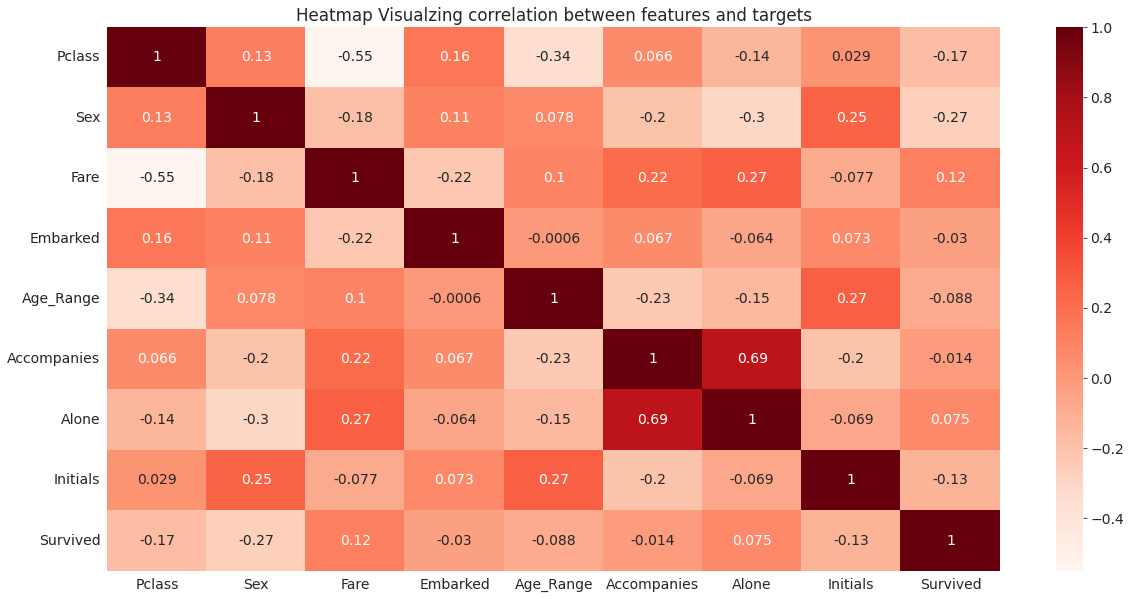

In [913]:
# plotting a heatmap to properly visualize the correlation
sns.heatmap(df.corr(),cmap='Reds', annot=True).set(title ='Heatmap Visualzing correlation between features and targets');

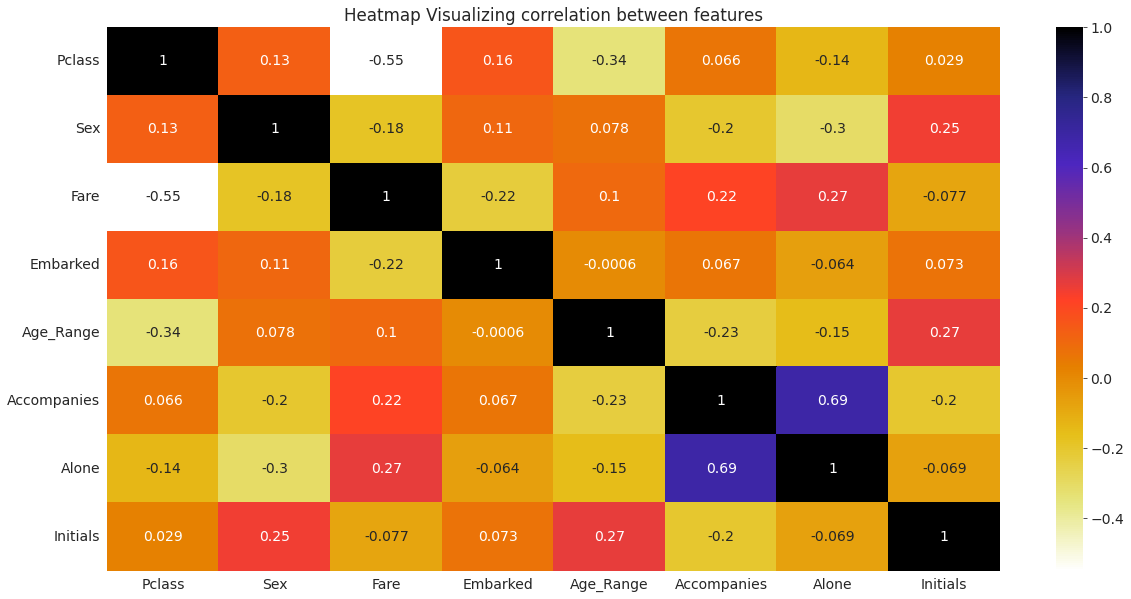

In [914]:
# plotting a heatmap to properly visualize the correlation
sns.heatmap(df[df.columns.to_list()[:-1]].corr(), annot=True, cmap=plt.cm.CMRmap_r).set(title = 'Heatmap Visualizing correlation between features');

In [915]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, pos_threshold, neg_threshold):
    data = {}
    correlation_matrix = df[df.columns.to_list()[:-1]].corr()
    for i in range(len(correlation_matrix.columns)):
        for j in range(i):
            if (((correlation_matrix.iloc[i, j]) > pos_threshold) or (((correlation_matrix.iloc[i, j]) < neg_threshold))): 
                a = []  
                col_i = correlation_matrix.columns[i]  
                col_j = correlation_matrix.columns[j]
                
                a.append(col_i)
                a.append(col_j)

                data[round(correlation_matrix.iloc[i, j], 3)] = a
    return data

In [916]:
data = correlation(df, 0.45, -0.6)
data

{0.691: ['Alone', 'Accompanies']}

From the above calculations and heatmaps, we can clearly see that the two features, `Alone` and `Accompanies` are strongly correlated with Pearson correlation coefficient being 0.69. This indicates that, for the rise of first feature, the second feature will also consistently rise. This means that these two features are identical and show same characteristics. Hence, it is best that we drop one of these two columns.

Since, the column `Alone` is strongly correlated with target `Survived` than feature`Accompanies`, I will be dropping the feature `Accompanies` respectively.


In [917]:
df.drop('Accompanies', axis = 1, inplace = True)

<b> Scaling the Features using StandardScaler Class from Scikit-Learn</b>

Our ML models work with numbers. Inside our ML models, numbers are getting added, subtracted, multiplied etc. So, in the features, if there is a vast difference in the range of values, the model tends to make an assumption that the bigger number are more impactful than the smaller numbers. So, this hinders the ability of model as bigger numbers will play more role than smaller numbers.

Hence, before feeding the data to model, it is very important for us to scaler the features such that they all come in same range.

For scaling the features, I will be using StandardScaler class from scikit-learn. What StandardScaler does is that, it subtracts every value in features by the column's mean and then, divides by the standard deviation

```
For a sample x, the scaled value using StandardScaler would be 
  
  scaled(let) = (x - u) / sd

  where, u is the mean and sd is standard deviation
```

In [918]:
# scaling the features using StandardScaler

# instantiating the object for StandardScaler class
scaler = StandardScaler().fit(df[df.columns.to_list()[:-1]])

In [919]:
# We will only be scaling our features not target
df[df.columns.to_list()[:-1]] = scaler.transform(df[df.columns.to_list()[:-1]])

In [920]:
# the calculated mean for corresponding columns
scaler.mean_

array([ 2.30864198,  0.64758698, 32.20420797,  1.53647587,  2.34006734,
        0.3973064 , 10.24130191])

In [921]:
# the calculated variance for corresponding columns
scaler.var_

array([6.98230591e-01, 2.28218083e-01, 2.46666531e+03, 6.25773888e-01,
       1.73059438e+00, 2.39454024e-01, 3.34805846e+00])

In [922]:
# the names of the features that have been scaled
scaler.feature_names_in_

array(['Pclass', 'Sex', 'Fare', 'Embarked', 'Age_Range', 'Alone',
       'Initials'], dtype=object)

<b> Lets look at our final preprocessed dataframe </b>

In [923]:
df

,Pclass,Sex,Fare,Embarked,Age_Range,Alone,Initials,Survived
0,0.827377,0.737695,-0.502445,0.585954,-0.258504,1.231645,0.414641,0
1,-1.566107,-1.355574,0.786845,-1.942303,0.501651,1.231645,0.961158,1
2,0.827377,-1.355574,-0.488854,0.585954,-0.258504,-0.811922,-1.224909,1
3,-1.566107,-1.355574,0.420730,0.585954,0.501651,1.231645,0.961158,1
4,0.827377,0.737695,-0.486337,0.585954,0.501651,-0.811922,0.414641,0
...,...,...,...,...,...,...,...,...
886,-0.369365,0.737695,-0.386671,0.585954,-0.258504,-0.811922,2.054191,2
887,-1.566107,-1.355574,-0.044381,0.585954,-1.018659,-0.811922,-1.224909,1
888,0.827377,-1.355574,-0.176263,0.585954,-0.258504,1.231645,-1.224909,0
889,-1.566107,0.737695,-0.044381,-1.942303,-0.258504,-0.811922,0.414641,1


## 4. Logistic Regression Model using Scikit-Learn

Logistics Regression is a supervised learning algorithm that is used to make prediction between multiple classes in the target column.  Meaning that, this algorithm is used for classifciation problems.

Logistic Regression, in many ways, works similar to Linear Regression. The only difference is that after predicting a continuous value from the corresponding weights and biases, logistic regression calculates the probability for the number of classes in the target column. let us consider we are solving a binary classification problem. In that case, logistic regression, after calculating the continuous value(y), applies that value into a `Sigmoid Functon`. I will explain how a Logistic Regression works below:



Let us consider a dataset that contains a feature `Sugar` and a target `t`. Feature `Sugar` contains the data related to the amounts of sugar present in persons body and target column contains values 0 meaning the person has no dibeties and 1 meaning person has dibeties. So, this is a binary classification problem. Let `w` be the weights of the feature`Sugar` and `b` be the bias.

So, we get an equation as follows:

```
    y = w * Sugar + b,
    where, w = weights of feature Sugar which is randomly initialized at first
    b = bias which is also randomly initialized at first

Then, we apply sigmoid function such as:
probability for t(p) = 1 / (1 + e ^ -y)

In this case, if the probability for diabeties is greater than 0.5, we can
consider the target class to be 1 for the corresponding feature. Similarly, 
if the calculated probability for diabeties is less than 0.5, the target
class is 0. The number that helps to determine to which class a set of 
features belong to, is called probability threshold. In this case, 
probability threshold is 0.5.

```

Initially, weights and bias are initialized at random. Then, the training loop is run for a number of iterations called `Epochs`. Then, in every `epoch`, the weights and bias are updated as:

    weights = weights - learning_rate * derivative of loss with respect to weights

    bias = bias - learning_rate * derivative of loss with respect to bias

Here, the most popular optimization algorithm `Gradient Descent` is utilized. Unlike in `Linear Regression` where we used RMSE/MSE as a loss function, in this classification problems, we will use a loss function called `Cross Entropy`. 

For each target row, we will take the predicted probaility for the correct label.Then, we will take the logarithm of the selected probabilty. In doing so, if the probability is high(or very close to 1), the the corresponsing logarithm will be a very small negative value. Similarly, if the selected probability is very low(or close to 1), then the logarithm will be a very large negative number. Therefore, after multiplying the result by - 1, the larger negative values will become larger positive values which indicate the loss for incorrect or poor predictions. This is how `Cross Entropy` works. Similarly, we will take the average of the cross entropy of all the target rows from our predictions and get final loss.  

We know that, the cross entropy loss is a function of weights and bias. This means, we can also calculate the derivative of loss with respect to weights and biases called gradients. These gradients will be used in our `Gradient Descent` algorithm to find the optimal values of weights and bias such that our model makes more accurate predictions. 

In this way, `Logistic Regression` with `Gradient Descent` optimization algorithm, can be used to make predictions for classification problems. This algorithm is exactly what I will be using to make predictions on my preprocessed data.


Since this project is a multilabel classification problem, I will make use of Logistic Regression along with softmax function as we will be predicting between 3 classes.


### 4.1 Creating Training, Validation and Testing Sets


I will make use of train_test_split class from sklearn to divide our original dataset into 2 parts: Training set, and Testing set.

<b> Since there are only about 800 rows of data in our dataframe, it best best 
we only create Training and Testing set. This is because, if we also create 
validation data, there will be even less training data. Thus could result in 
our model to underfit: Our model can't learn anything due to less data. </b>

```
Training Set will be used to train the model

Testing Set will be used to analyze models performance while performing 
Hyperparameter Tuning and will also be used to measure final performance of
 our model
```

In [924]:
# creating our feature matrix
X = df[df.columns.to_list()[:-1]]

# creating our response vector
y = df['Survived']

In [925]:
# printing the first five rows of our feature matrix
X.head()

,Pclass,Sex,Fare,Embarked,Age_Range,Alone,Initials
0,0.827377,0.737695,-0.502445,0.585954,-0.258504,1.231645,0.414641
1,-1.566107,-1.355574,0.786845,-1.942303,0.501651,1.231645,0.961158
2,0.827377,-1.355574,-0.488854,0.585954,-0.258504,-0.811922,-1.224909
3,-1.566107,-1.355574,0.420730,0.585954,0.501651,1.231645,0.961158
4,0.827377,0.737695,-0.486337,0.585954,0.501651,-0.811922,0.414641


In [926]:
# printing the last five rows of our response vector
y.tail()

886    2
887    1
888    0
889    1
890    0
Name: Survived, dtype: int64

In [927]:
# creating training and testing set

# here, random_state = 0 makes sure that everytime we run this, we get the same split
# test_size = 0.20 makes sure our training set will have 80 % data and validation will have 20 % respectively
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.20)  

In [928]:
# printing the shapes of X_train and y_train
print(X_train.shape)   
print(y_train.shape)

(712, 7)
(712,)


In [929]:
# printing the shapes of X_val and y_val
print(X_test.shape)
print(y_test.shape)

(179, 7)
(179,)


### 4.2 Making Predictions and Calculating Accuracy

In [930]:
# Creating the object for the LinearRegression class with all hyperparameters set to default
# I will set multi_class hyperparameter to multinomial as this is a multiclass classification
log_reg = LogisticRegression(random_state = 0, multi_class='multinomial')

In [931]:
# fit method takes in a feature matrix and a response vector
# this method is used to train our model and find optimal values of weights and bias
log_reg.fit(X_train,y_train)

LogisticRegression(multi_class='multinomial', random_state=0)

In [932]:
# this returns the coefficients or weights of corresponding columns
# this gives weights for corresponding columns for respective labels
log_reg.coef_

array([[ 0.40563825,  0.56384373, -0.02647333, -0.01903686,  0.28169191,
         0.10947235,  0.11729961],
       [-0.47412867, -0.64735553, -0.03665712, -0.12945214, -0.1712156 ,
         0.06460849, -0.06660851],
       [ 0.06849042,  0.08351179,  0.06313045,  0.148489  , -0.11047631,
        -0.17408084, -0.0506911 ]])

In [933]:
# this returns true if we have used intercept/bias for calculation
log_reg.fit_intercept

True

In [934]:
# this returns the intercept/bias calculated
# this gives the intercept for corresponding columns for respective labels
log_reg.intercept_

array([ 0.5268777 , -0.11346158, -0.41341611])

In [935]:
# getting our feature columns from training set
feature_cols = X_train.columns.to_list();feature_cols

['Pclass', 'Sex', 'Fare', 'Embarked', 'Age_Range', 'Alone', 'Initials']

<b>Weights and Bias For class 0 </b>

In [936]:
#pairing the feature names with coefficients
zipped = list(zip(feature_cols, log_reg.coef_[0])) 
print(zipped)

[('Pclass', 0.4056382475473267), ('Sex', 0.5638437348043538), ('Fare', -0.02647333376474629), ('Embarked', -0.019036857287160373), ('Age_Range', 0.28169190840352915), ('Alone', 0.1094723542906358), ('Initials', 0.11729961002923278)]


In [937]:
equation = ""

for i in zipped:
  equation += '( ' + i[0] + ' * ' + str(round(i[1],2)) +' )'+' '

equation += ' + '+ '( '+str(round(log_reg.intercept_[0],2))+' )'

print("The equation for class 0 is: \n")
print('y(0) = '+equation)

The equation for class 0 is: 

y(0) = ( Pclass * 0.41 ) ( Sex * 0.56 ) ( Fare * -0.03 ) ( Embarked * -0.02 ) ( Age_Range * 0.28 ) ( Alone * 0.11 ) ( Initials * 0.12 )  + ( 0.53 )


In [938]:
# lets create a new dataframe containing the weights and bias of class 0 for our model
weights_and_intercept = pd.DataFrame({
    'Features':np.append(feature_cols, 'Intercept'),
    'Weight':np.append(log_reg.coef_[0], log_reg.intercept_[0])
});weights_and_intercept

,Features,Weight
0,Pclass,0.405638
1,Sex,0.563844
2,Fare,-0.026473
3,Embarked,-0.019037
4,Age_Range,0.281692
5,Alone,0.109472
6,Initials,0.117300
7,Intercept,0.526878


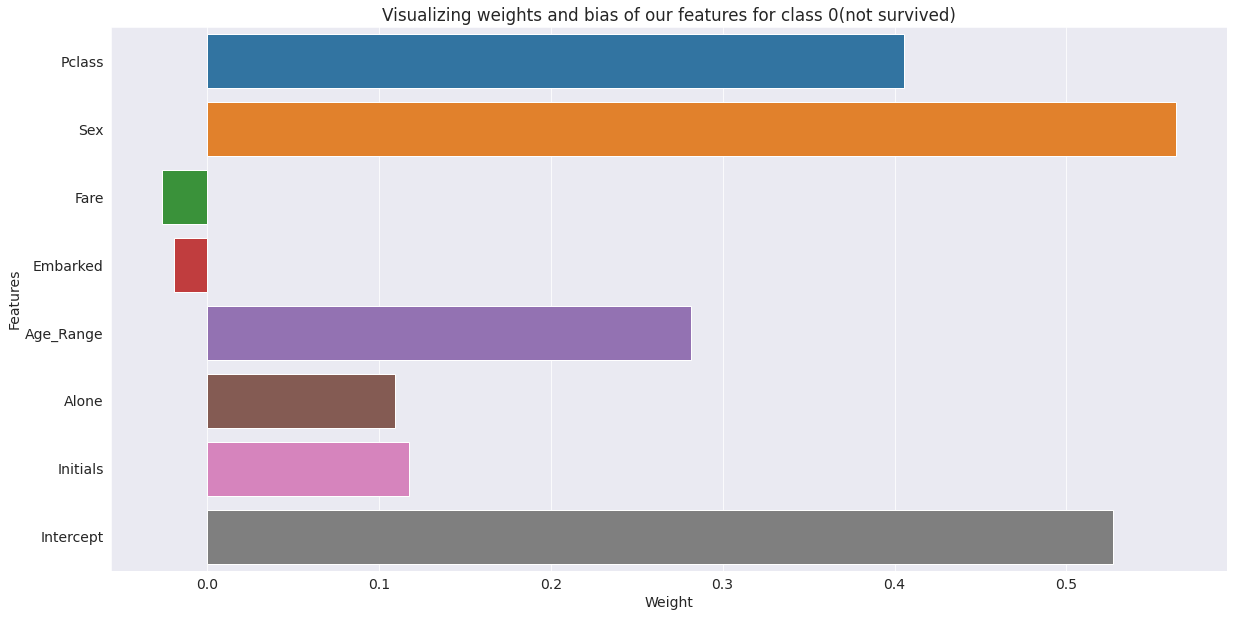

In [939]:
sns.barplot(x = 'Weight', y = 'Features', data = weights_and_intercept).set(title = 'Visualizing weights and bias of our features for class 0(not survived)');

For label 0, the column that had most effect in terms of magnitude is Sex. Similarly, the bias/intercept has the second highest effect while predicting if the output is class 0 among all others.

<b>Weights and Bias For class 1 </b>

In [940]:
#pairing the feature names with coefficients
zipped = list(zip(feature_cols, log_reg.coef_[1])) 
print(zipped)

[('Pclass', -0.4741286690893884), ('Sex', -0.6473555262263179), ('Fare', -0.03665711547398095), ('Embarked', -0.12945214357921295), ('Age_Range', -0.17121559726423832), ('Alone', 0.06460848767632041), ('Initials', -0.06660850512158133)]


In [941]:
equation = ""

for i in zipped:
  equation += '( ' + i[0] + ' * ' + str(round(i[1],2)) +' )'+' '

equation += ' + '+ '( '+str(round(log_reg.intercept_[1],2))+' )'

print("The equation for class 1 is: \n")
print('y(1) = '+equation)

The equation for class 1 is: 

y(1) = ( Pclass * -0.47 ) ( Sex * -0.65 ) ( Fare * -0.04 ) ( Embarked * -0.13 ) ( Age_Range * -0.17 ) ( Alone * 0.06 ) ( Initials * -0.07 )  + ( -0.11 )


In [942]:
# lets create a new dataframe containing the weights and bias of class 1 for our model
weights_and_intercept = pd.DataFrame({
    'Features':np.append(feature_cols, 'Intercept'),
    'Weight':np.append(log_reg.coef_[1], log_reg.intercept_[1])
});weights_and_intercept

,Features,Weight
0,Pclass,-0.474129
1,Sex,-0.647356
2,Fare,-0.036657
3,Embarked,-0.129452
4,Age_Range,-0.171216
5,Alone,0.064608
6,Initials,-0.066609
7,Intercept,-0.113462


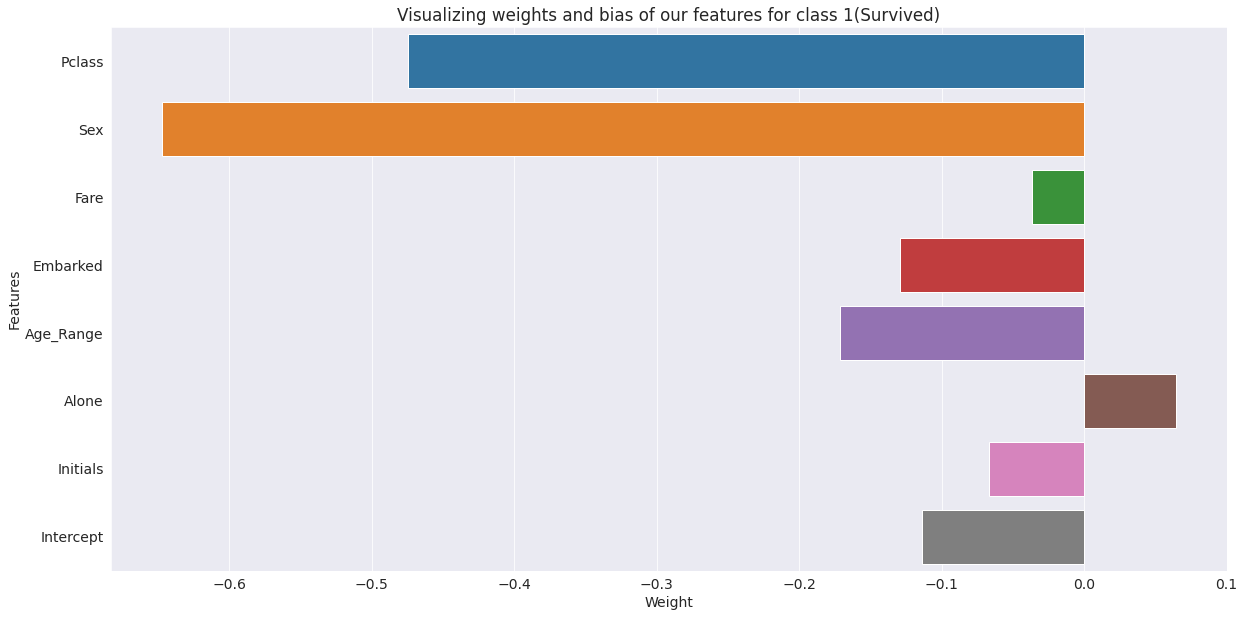

In [943]:
sns.barplot(x = 'Weight', y = 'Features', data = weights_and_intercept).set(title = 'Visualizing weights and bias of our features for class 1(Survived)');

For label 1,  the Sex column has the most effect while making predictions. Similarly, Pclass has the second highest effect while predicting if the class is 1.

<b> For class 2 </b>

In [944]:
#pairing the feature names with coefficients
zipped = list(zip(feature_cols, log_reg.coef_[2])) 
print(zipped)

[('Pclass', 0.06849042154206231), ('Sex', 0.08351179142196392), ('Fare', 0.06313044923872724), ('Embarked', 0.14848900086637357), ('Age_Range', -0.11047631113929043), ('Alone', -0.1740808419669559), ('Initials', -0.05069110490765219)]


In [945]:
equation = ""

for i in zipped:
  equation += '( ' + i[0] + ' * ' + str(round(i[1],2)) +' )'+' '

equation += ' + '+ '( '+str(round(log_reg.intercept_[2],2))+' )'

print("The equation for class 2 is: \n")
print('y(2) = '+equation)

The equation for class 2 is: 

y(2) = ( Pclass * 0.07 ) ( Sex * 0.08 ) ( Fare * 0.06 ) ( Embarked * 0.15 ) ( Age_Range * -0.11 ) ( Alone * -0.17 ) ( Initials * -0.05 )  + ( -0.41 )


In [946]:
# lets create a new dataframe containing the weights and bias of class 1 for our model
weights_and_intercept = pd.DataFrame({
    'Features':np.append(feature_cols, 'Intercept'),
    'Weight':np.append(log_reg.coef_[2], log_reg.intercept_[2])
});weights_and_intercept

,Features,Weight
0,Pclass,0.068490
1,Sex,0.083512
2,Fare,0.063130
3,Embarked,0.148489
4,Age_Range,-0.110476
5,Alone,-0.174081
6,Initials,-0.050691
7,Intercept,-0.413416


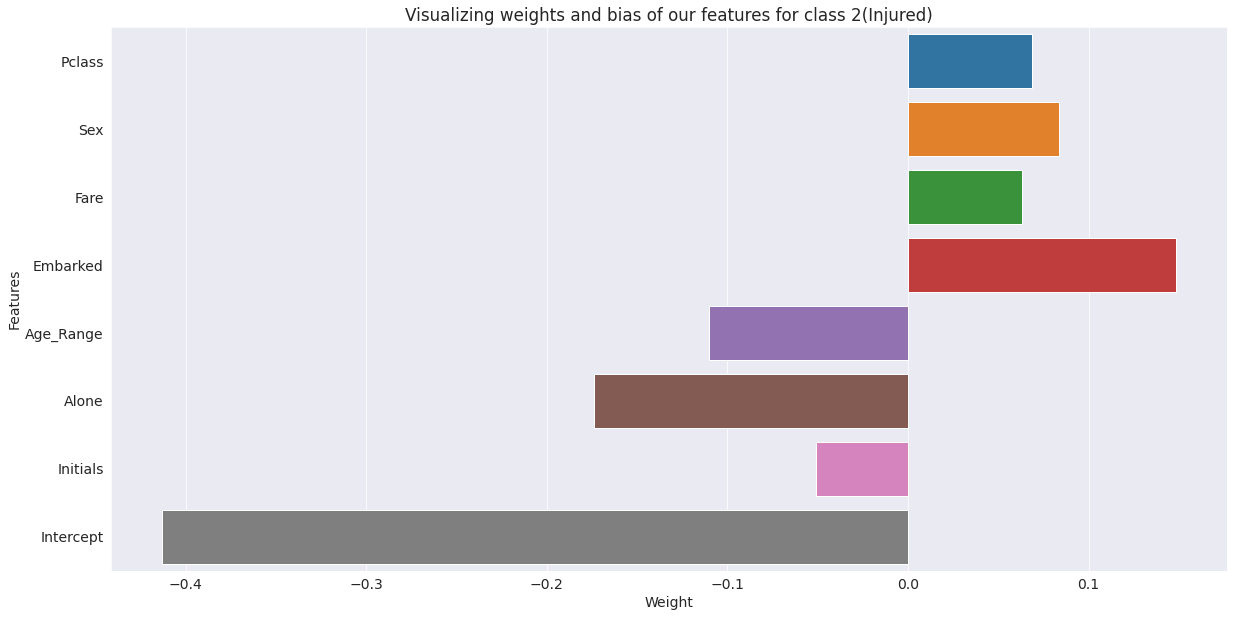

In [947]:
sns.barplot(x = 'Weight', y = 'Features', data = weights_and_intercept).set(title = 'Visualizing weights and bias of our features for class 2(Injured)');

For class 2, bias has the most effect. Similarly, column Initials has lowest effect if the prediction class is 2.

Lets make predictions on training and validation set and measure our loss.

In [948]:
train_preds = log_reg.predict(X_train)

In [949]:
test_preds = log_reg.predict(X_test)

We will use accuracy as a metric for analyzing our models performance.

In [950]:
print("Accuracy on training data: ",accuracy_score(y_train, train_preds))

Accuracy on training data:  0.6615168539325843


Our model's performance on training set is approximately 66 %. Lets check our accuracy for testing set

In [951]:
print("Accuracy on testing data: ",accuracy_score(y_test, test_preds))

Accuracy on testing data:  0.664804469273743


In [952]:
test_preds

array([0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0])

Our models performance for validation set is roughly 66.5 %. Since our model has given similar accuracy on both training and testing set, we can also conclude that our model has not overfitted on training data.

INTERPRETATION: The models accuracy is 66.5 % means that on every 100 rows/ sets of data, our model was able to predict a correct label for only 66.5 times.

In [953]:
df.Survived.value_counts()/len(df)

0    0.514029
1    0.317621
2    0.168350
Name: Survived, dtype: float64

In [954]:
classes

['Not Survived', 'Survived', 'Injured']

In our target column, we can clearly see that almost 50 % of the people who boarded the titanic did not survive. Similarly, only 31 % people survived the titanic without injury. Therefore, with respect to the class frequency in the target column in our dataframe, a dumb model would make a correct predictions 33 % of the times as there are 3 classes. 

Our trained model gives 66.5 % accuracy roughly on testing set, which is not so good as compared to a dumb model. Therefore, my model will undergo `Hyperparameter Tuning` to further improve performance.

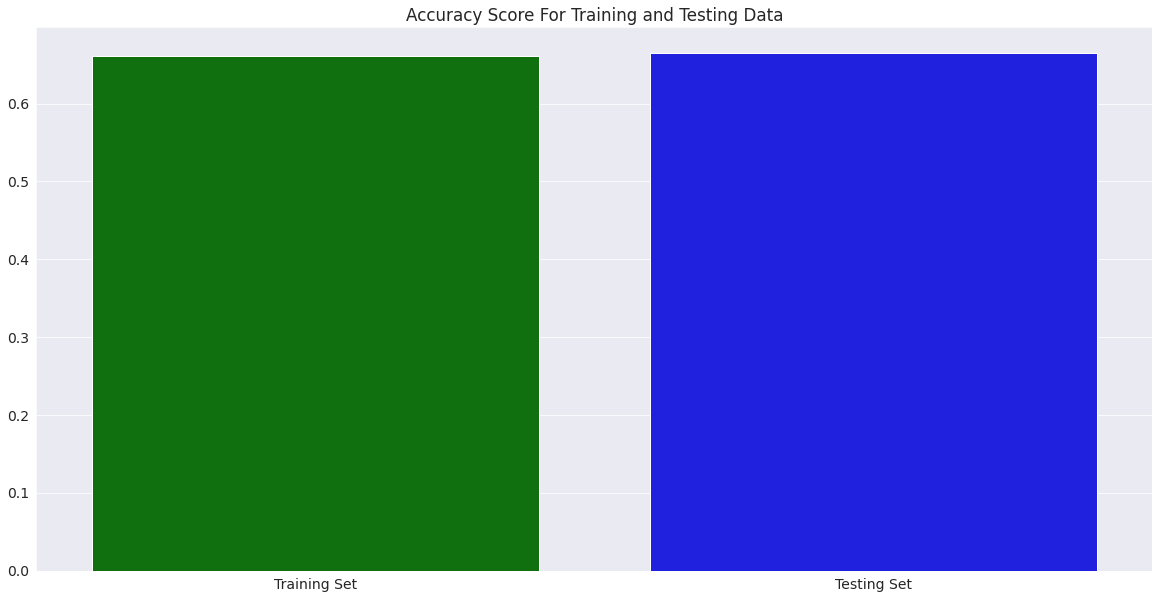

In [955]:
# plotting a barplot to visualize accuracy for training and validation predictions
sns.barplot(y = [accuracy_score(y_train, train_preds), accuracy_score(y_test, test_preds)], x = ['Training Set','Testing Set'], palette = ['green','blue']).set(title = 'Accuracy Score For Training and Testing Data');

Our model's accuracy on training set is slightly less than on Testing set. This indicates our model is performing on par on the data that it hasn't seen before as comared to the data it has been trained on.

<b> I have used the default Logistic regression model offered by Scikit-Learn. I will now tweak the Hyperparameters of this model to see if there is any increase in performance. </b>

### 4.3 Hyperparameter Tuning 

Hyperparameters simply refers to the parameters of a model that control the learning process and directly affect the descision making of a machine learning model.

The following Hyperparameters will be tuned:

  1. max_iter

  - This Hyperparameter refers to the number of iterations or epochs our logistic regression is to be trained on our training data for finding optimal weights and bias. Changing this value will help us for how long we should train our model before it starts `overfitting` on training data.

  2. fit_intercept

  - This Hyperparameter also takes in a boolean value(True/False). If 
  
  fit_intercept is set to False, our logistic regression model will not compute 
  
  calculation using bias/intercept. By default, it is set to True. We will also
  
   evaluate our model's loss function by making it False.


<b> Tuning fit_intercept hyperparameter </b>

In [956]:
# our default model
log_reg = LogisticRegression(n_jobs = -1, fit_intercept = True, random_state = 0, multi_class='multinomial').fit(X_train,y_train)

# calculating accuracy on training data
default_training_accuracy = accuracy_score(y_train, log_reg.predict(X_train))

# calculating accuracy on testing data
default_testing_accuracy = accuracy_score(y_test, log_reg.predict(X_test))

In [957]:
# our default model
log_reg = LogisticRegression(n_jobs = -1, fit_intercept = False, random_state = 0, multi_class='multinomial').fit(X_train,y_train)

# calculating accuracy on training data
new_training_accuracy = accuracy_score(y_train, log_reg.predict(X_train))

# calculating accuracy on testing data
new_testing_accuracy = accuracy_score(y_test, log_reg.predict(X_test))

In [958]:
practise_df = pd.DataFrame({
    'Models':['default_training_accuracy','new_training_accuracy','default_testing_accuracy','new_testing_accuracy'],
    'accuracy':[default_training_accuracy, new_training_accuracy, default_testing_accuracy, new_testing_accuracy]
});practise_df

,Models,accuracy
0,default_training_accuracy,0.661517
1,new_training_accuracy,0.646067
2,default_testing_accuracy,0.664804
3,new_testing_accuracy,0.675978


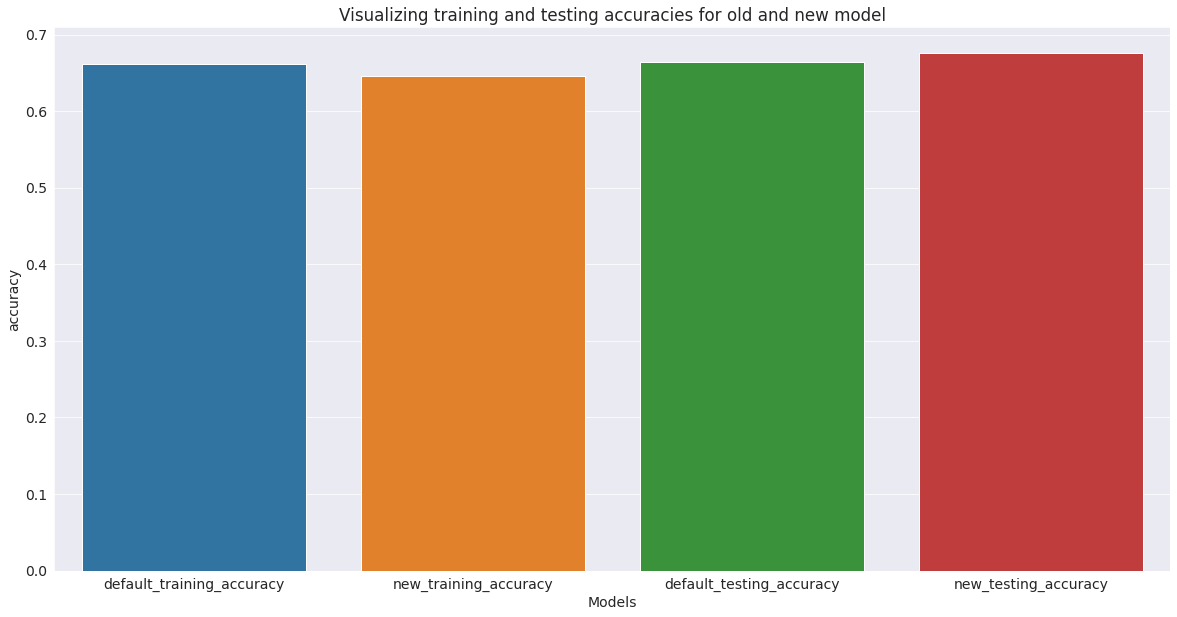

In [959]:
sns.barplot(data = practise_df, x = 'Models',y = 'accuracy').set(title = 'Visualizing training and testing accuracies for old and new model');

It looks like our model performed better when intercept/bias was included. Therefore, for this hyperparameter, we will not be making any changes.

In [960]:
# our default model
log_reg = LogisticRegression(n_jobs = -1, fit_intercept = True, random_state = 0, multi_class='multinomial').fit(X_train,y_train)

<b> Tuning hyperparameter max_iter </b>

By default, the max_iter hyperparameter for logistic regression model from scikit-learn is set to 100.

In [961]:
max_iter_ranges = list(range(0,500,50))

training_accuracies = []
testing_accuracies = []

for i in max_iter_ranges:
  log_reg = LogisticRegression(n_jobs = -1, random_state = 42,fit_intercept = True, max_iter = i)
  log_reg.fit(X_train, y_train)
  training_accuracies.append(accuracy_score(y_train,log_reg.predict(X_train)))
  testing_accuracies.append(accuracy_score(y_test, log_reg.predict(X_test)))

In [962]:
print("We have achieved maximum Training accuracy that is "+str(max(training_accuracies))+" ,when max_iter was set to "+str(max_iter_ranges[training_accuracies.index(max(training_accuracies))+1]))

We have achieved maximum Training accuracy that is 0.6615168539325843 ,when max_iter was set to 100


In [963]:
print("We have achieved maximum testing accuracy that is "+str(max(testing_accuracies))+" ,when max_iter was set to "+str(max_iter_ranges[testing_accuracies.index(max(testing_accuracies))+1]))

We have achieved maximum testing accuracy that is 0.664804469273743 ,when max_iter was set to 50


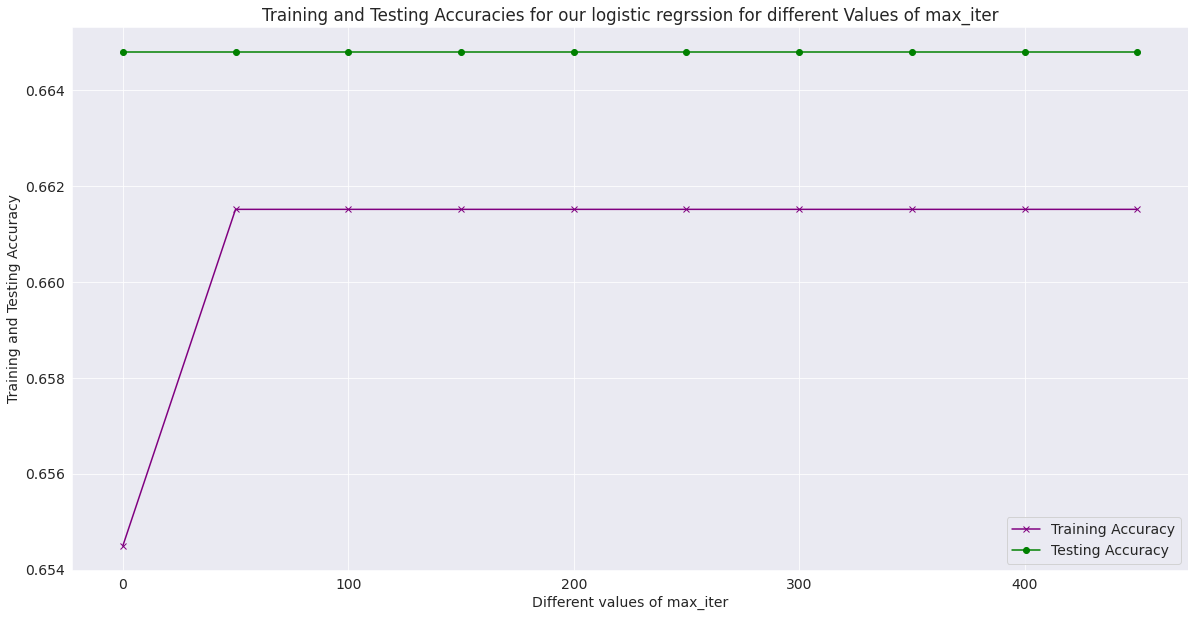

In [964]:
# lets plot the training and validation accuracies for our logistic regression model for changing values of max_iter 

plt.title('Training and Testing Accuracies for our logistic regrssion for different Values of max_iter')

plt.plot(max_iter_ranges, training_accuracies, color = 'purple', marker = 'x')
plt.plot(max_iter_ranges, testing_accuracies, color = 'green', marker = 'o')
plt.xlabel('Different values of max_iter')
plt.ylabel('Training and Testing Accuracy')
plt.legend(['Training Accuracy','Testing Accuracy']);

We can clearly see that any changes in max_iter hyperparameter has made no improvements in the testing set whatsoever. However, on training set, setting max_iter to 100 gives us optimal performance. Thus, we will tune our model that way.

Since our model shows no signs of overfitting, I will set the model's max_iter value to 100.

In [965]:
# our default model
log_reg = LogisticRegression(n_jobs = -1, fit_intercept = True, random_state = 0, multi_class='multinomial').fit(X_train,y_train)

<b> Lets get our model's final training and testing accuracies

In [966]:
print("The final training accuracy is: {}".format(accuracy_score(y_train, log_reg.predict(X_train))))

The final training accuracy is: 0.6615168539325843


In [967]:
print("The final testing accuracy is: {}".format(accuracy_score(y_test, log_reg.predict(X_test))))

The final testing accuracy is: 0.664804469273743


### 4.4 Confusion Matrix

<b> Creating a Confusion Matrix </b>

In case of classification problems, interpreting a model's performance soley based on the accuracy is never a good idea. Let us consider a binary classification problem where there are two classes: 0 and 1. if 0 is a negative class and 1 is a positive class, for every prediction be it positive or negative, there are 4 different combinations: `True Positive`, `True Negative`, `False Positive` and `False Negative`.

```
Let us consider a binary classification problem where we are predicting whether
 a female is pregnant or not. Let being pregnant be a positive class, and being 
 not pregnant be a negative class. Then, for every individual prediction, one 
 of the following combination is true for that prediction:

1. True Positive
  - Our model predicts a positive class(Pregnant) and its a correct prediction.

2. True Negative
  - Our model predicts a negative class(not pregnant) and its a correct prediction

3. False Positive (Type 1 Error)
  - Our model predicts a positive class(pregnant) but its an incorrect prediction

4. False Negative (Type 2 Error)
  - Our model predicts a negative class(not pregnant) but the actual target is a positive(pregnant).


The reason accuracy is not a best metric to evaluate a model's performance is given below.
```
Lets say we are developing a ML Classification model that is supposed to 
predict whether a person has cancer or not. Let having cancer be a positive 
class, and not having cancer be a negative class. If the model predicts that a 
person has a cancer, how do we make sure that it is not a false positive. And,
if a model predicts that a person has no cancer, how do we know that it is not
a false negative.

Just by looking a the accuracy of the model will result in an incorrect/poor
observation of a model's performance. If only accuracy is looked after for 
using a model's prediction to determine whether a person has cancer or not, it 
will be an absolute disaster for than person. Because, if model gives a false
negative prediction, the person actually has a cancer but won't know because
the developers only observed the accuracy for that model.
   

In this case, evaluation metrics like Recall, Precision, F1 Score etc help us 
understand a classification model's true performance with respect to TP,FP,TN 
and False Negatives respectively. We can understand the concepts of TP,FP,TN 
and FN by creating a confusion matrix.
```
I will be making use of scikit-learn to generate a confusion matrix to visualize all true/false positives and negatives for my logistic regression model.

In [968]:
# confusion matrix for validation set
confusion_matrix = confusion_matrix(y_test,log_reg.predict(X_test));confusion_matrix

array([[77, 18,  0],
       [14, 42,  0],
       [16, 12,  0]])

In [969]:
cm = pd.DataFrame(confusion_matrix,
                     index = classes, 
                     columns = classes)

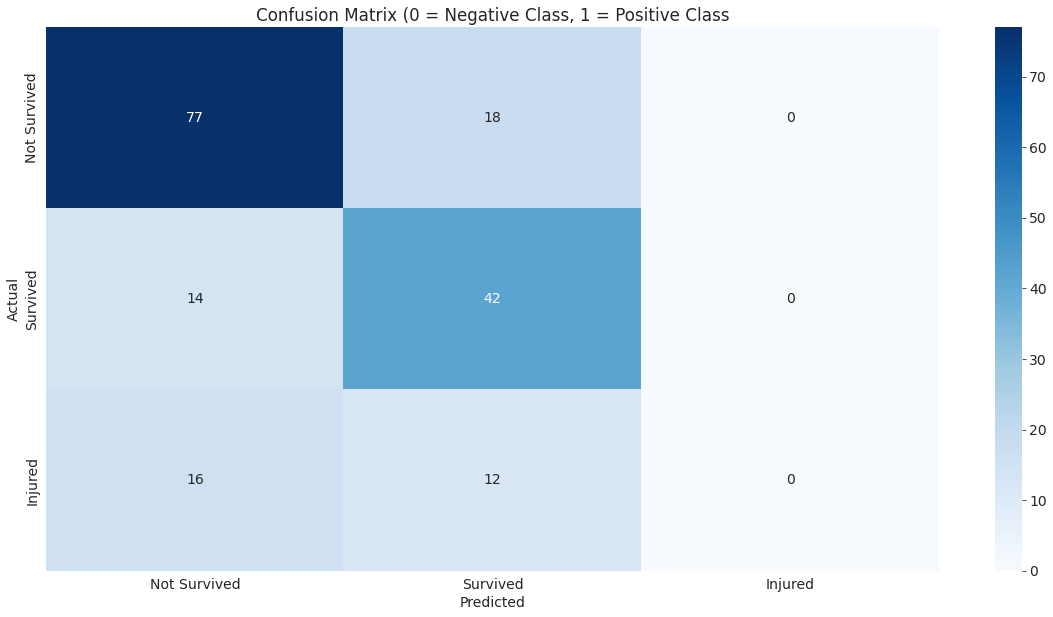

In [970]:
sns.heatmap(cm, cmap="Blues", annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix");

Let 0 be the class for passenger not surviving, 1 be the class for a passenger surviving and 2 for passenger being injured.
```
From the above confusion matrix, we can make the following observations:

  1. Our model correctly predicted 77 times that a passenger wont survive the titanic

  2. Our model correctly predicted 42 times correctly that a passenger will survive a titanic.

  3. Our model correctly predicted 0 times that a person will be injured in the titanic. 

```

Since this is a multilabel classification problem, we cannot use the methods from binary classification to calculate True positives, False Negatives, False Positives, and True Negative.

For a multiclass classification, We need to calculate TN, TP, FP, and FN for all individual classes one by one.
```
For an individual class in multiclass classification:

FN: The False-negative value for a class will be the sum of values of 
corresponding rows except for the TP value.

FP: The False-positive value for a class will be the sum of values of the 
corresponding column except for the TP value.

TP: The True positive value is where the actual value and predicted value are 
the same.

TN: The True Negative value for a class will be the sum of values of all 
columns and rows except the values of that class that we are calculating the 
values for.
```
I will calculate the positives and negatives for one class only, and will use classification report class offered by sklearn library to summarize model's performance over all three classes.

<b> For class 0 (Not survived) </b>

For True positive, the actual and predicted values must be same. Therefore, for this class, the value of cell 1 is the TP

In [971]:
# True positive for class 0
TP = 77

For False Negative of class 0, we will add corresponding values in first row except cell 1

In [972]:
# False Negative of class 0
FN = 18 + 0

For False Positive of class 0, we will add all values of correponding column except for True Positive value.

FP = (cell 4 + cell 7)

In [973]:
# False positive for class 0
FP = 14 + 16

For True Negatives, we will calculate the sum of values of all columns and row except the values of that class that we are calculating the values for.

TN = (cell 5 + cell 6 + cell 8 + cell 9)

In [974]:
# True Negative class for class 0
TN = 42 + 0 + 12 + 0

In [975]:
print("For Class 0 (Not survived): ")
print("True Positives: ", TP)
print("True Negatives: ", TN)
print("False_Positive: ", FP)
print("False_Negative: ", FN)

For Class 0 (Not survived): 
True Positives:  77
True Negatives:  54
False_Positive:  30
False_Negative:  18


I will now be explaining some of the metrics I can analyze using results from confusion matrix for class 0.

<b> Classification Error </b>

A classification error simply represents how often is our model incorrect. </b>

In [976]:
print((FP+FN)/ float(TP+TN+FP+FN))

0.2681564245810056


or

A classification error is 26 % means that our model predicted a wrong class 20 % of the time.

<b> Sensitivity or Recall </b>

When an actual value is positive, how often is the prediction made by our model is correct is given by Recall.

In [977]:
recall = TP /float(TP+FN)
print(recall)

0.8105263157894737


or

Here, a recall score of 81 % for class 0 means that if our model makes a class 0 prediction, it is correct 81 % of the times. Therefore, if our model makes a prediction that a passenger has not survived the titanic , it being correct has a probability of 0.81 approximately.

<b> Specificity </b>

When the actual value is negative, how often is the prediction made by our model correct is given by Specificity.

In [978]:
print(TN/float(TN + FP))

0.6428571428571429


Here, a Specificity is almost 64 % indicates that if our model makes a negative class prediction(not 0 class), it is correct 83 % of the times. Therefore, if our model makes a prediction that a passenger did not survive the titanic, it being correct has a probability of 0.993 approximately.

<b> False Positive Rate </b>

When an actual value is negative, how often is the prediction made by our model incorrect is given by the False Positive Rate.

In [979]:
print(FP/float(TN+FP)) # note: False positive rate = (1 - specificity)

0.35714285714285715


So, a False Positive Rate of approximately 35 % means that if the target is negative (not class 0), our model makes an incorrect prediction(FP) 35  % of the times.

In [980]:
print("We can also see False Positive Rate = 1 - specificity: ", 1 - TN/float(TN + FP))

We can also see False Positive Rate = 1 - specificity:  0.3571428571428571


<b> Precision </b>

When our model makes a positive class prediction, how often is the prediction correct is given by precision.

In [981]:
precision = TP / float(TP + FP)
print(precision)

0.719626168224299


or

A model is roughly 72 % precise for class 0 indicates that our model when predicting positive classes(in this case, predicting a passenger did not survive the titanic), our model is correct 72 % of the times.

<b> F1 - Score </b>

F1 Score is the weighted average of Precision and Recall. Mathematically, F1 Score would look like:

  ```
  2 * Recall * Precision / (Recall + Precision)
  ```

In [982]:
2 * (recall * precision) / (recall + precision)

0.7623762376237623

The f1 score for the predictions made on the validation set is calculated to be approximately 0.76.

In [983]:
print(classification_report(y_test, log_reg.predict(X_test), target_names = list(classes), zero_division = 0))

              precision    recall  f1-score   support

Not Survived       0.72      0.81      0.76        95
    Survived       0.58      0.75      0.66        56
     Injured       0.00      0.00      0.00        28

    accuracy                           0.66       179
   macro avg       0.43      0.52      0.47       179
weighted avg       0.56      0.66      0.61       179



Therefore, we implement same steps to calculate True and False positives and negatives for other classes as well. Since that step would be lengthy, I have used classification report class from Sklearn library to calculate precision, recall, f1-score etc for all 3 individual classes simultaneously.

Looking at the above classification report, we can clearly see that our model is most precise for class 0. Due to imbalances among the classes in target column, our model doesnot perform equally among all classes respectively.

### 4.5 ROC Curve  and AUC

Here, for 3 individual classes, a positive class means predicting that particular class and negative class means not predicting that particular class.

The ROC curve stands for `Receiver Operator Characteristics` curve that is one of the most important evaluation metric for a classification problem like this project. It is a probability curve in which True Positive Rate is plotted in y-axis and False positive Rate is plotted on x-axis at all classification thresholds. Similarly, the Area Under the Curve(AUC) is the measure of the ability of a classification model to predict correct classes. Therefore, the higher is the AUC, the better will be the model's performance to predict positive and negative classes respectively.

The AUC score is a very good single number summary of a classification number. If a model has AUC score of 1, such model can almost perfectly diffrentiate between positive and negative classses. Similarly, a model with AUC score 0 means the model makes all predictions wrong. Finally, if a model ha AUC score of 0.5, it means the model has absolutely no ability to seperate betweeen positive and negative classes respectively. It's as if a model is randomly guessing the classes with the probability of each class occurring is 0.5.

Before plotting the curve, lets calculate the True Positive Rate(TPR) and False Positive Rate(FPR).

```
A TPR helps us to understand the proportion of the positive class predictions that were correct. 
TPR = sensitivity = TP / (TP  + FN)

Similarly, False Positive Rate(FPR) helps us to understand the proportion of 
the negative class predictions that were incorrectly predicted by our Logistic Regression model.

FPR = 1 - specificity = FP / (TN + FP)
```

Here, if a model has a higher TPR, the ability of a model to recognize positive classes will be higher. Similarly, we know `True Negative Rate(TNR) ` = 1 - FPR. Therefore, a lower FPR means higher TNR. If our model has a higher TNR, our model will also be able to recognize negativce classes with higher accuracy.

Therefore, higher TNR and TPR will result in our model to properly differentiate between positive and negative classes. Therefore, a ROC curve will help us visualize our model sensitivity and specificity with respect to different threshold probabilities to seperate between positive and negative classes.


In [984]:
fprs = {}
tprs = {}
thresholds ={}

In [985]:
# predicting the probabilities for all classes on testing set
y_pred_proba  = log_reg.predict_proba(X_test)

In [986]:
# Using for loop for calculating false positive rate, true positive rate, and thresholds for all individual class and their probabilities
for i in range(len(target_encoded)):    
    fprs[i], tprs[i], thresholds[i] = roc_curve(y_test, y_pred_proba[:,i], pos_label=i)

In [987]:
classes

['Not Survived', 'Survived', 'Injured']

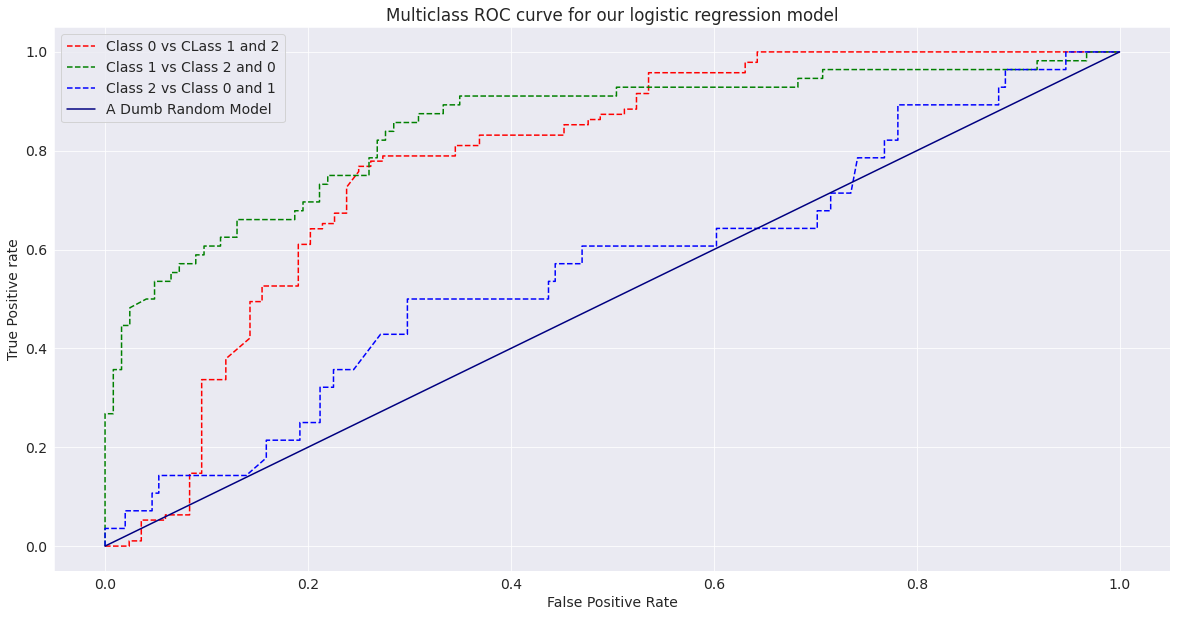

In [1001]:
# plotting  the roc curve for each class
plt.title('Multiclass ROC curve for our logistic regression model')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.plot(fprs[0], tprs[0], linestyle='--',color='red', label='Class 0 vs CLass 1 and 2')
plt.plot(fprs[1], tprs[1], linestyle='--',color='green', label='Class 1 vs Class 2 and 0')
plt.plot(fprs[2], tprs[2], linestyle='--',color='blue', label='Class 2 vs Class 0 and 1') 
plt.plot([0, 1], [0, 1], color="navy", label = "A Dumb Random Model")
plt.legend();
#plt.legend(['Class 0 -> Not survived', ' Class 1 -> Survived', 'Class 2 -> Injured'])


AUC simply means the area under the ROC curve. From the above plot, the area under the red , green and blue curves denote AUC(area under the curve) for classses 0, 1, and 2 respectively.

In [989]:
# thresholds for all 3 classes
thresholds

{0: array([1.87015013, 0.87015013, 0.8666553 , 0.86650429, 0.82888871,
        0.80794143, 0.80424317, 0.80411711, 0.79616511, 0.77777432,
        0.77746535, 0.77729774, 0.76638283, 0.75710267, 0.75405922,
        0.739512  , 0.73371539, 0.71923537, 0.71921524, 0.71920467,
        0.71916547, 0.71763255, 0.71751949, 0.71716414, 0.70649548,
        0.69211492, 0.65743299, 0.65244676, 0.6524128 , 0.65236943,
        0.65219711, 0.65187512, 0.62178364, 0.62172497, 0.61792113,
        0.60452382, 0.59402224, 0.58444761, 0.57892507, 0.57755817,
        0.57696563, 0.56093842, 0.53343372, 0.5327249 , 0.49856835,
        0.48125131, 0.40522891, 0.3995888 , 0.39916135, 0.39703451,
        0.36752111, 0.35343594, 0.34223726, 0.32853841, 0.32640706,
        0.31888241, 0.28677848, 0.26730902, 0.26092766, 0.26071758,
        0.26045119, 0.25587988, 0.24250845, 0.20988843, 0.20978783,
        0.19805545, 0.18951512, 0.18685911, 0.03732365]),
 1: array([1.89569824, 0.89569824, 0.80354568, 0.802513

In [990]:
# False positive rates for all 3 classes
fprs

{0: array([0.        , 0.01190476, 0.02380952, 0.02380952, 0.03571429,
        0.03571429, 0.05952381, 0.05952381, 0.08333333, 0.08333333,
        0.08333333, 0.08333333, 0.0952381 , 0.0952381 , 0.0952381 ,
        0.0952381 , 0.0952381 , 0.0952381 , 0.11904762, 0.11904762,
        0.14285714, 0.14285714, 0.14285714, 0.14285714, 0.1547619 ,
        0.1547619 , 0.19047619, 0.19047619, 0.19047619, 0.19047619,
        0.19047619, 0.20238095, 0.20238095, 0.21428571, 0.21428571,
        0.22619048, 0.22619048, 0.23809524, 0.23809524, 0.23809524,
        0.25      , 0.25      , 0.26190476, 0.26190476, 0.27380952,
        0.27380952, 0.3452381 , 0.3452381 , 0.36904762, 0.36904762,
        0.45238095, 0.45238095, 0.47619048, 0.47619048, 0.48809524,
        0.48809524, 0.51190476, 0.51190476, 0.52380952, 0.52380952,
        0.53571429, 0.53571429, 0.53571429, 0.5952381 , 0.63095238,
        0.63095238, 0.64285714, 0.64285714, 1.        ]),
 1: array([0.        , 0.        , 0.        , 0.008130

In [991]:
# true positive rates for all 3 classes
tprs

{0: array([0.        , 0.        , 0.        , 0.01052632, 0.01052632,
        0.05263158, 0.05263158, 0.06315789, 0.06315789, 0.10526316,
        0.12631579, 0.14736842, 0.14736842, 0.15789474, 0.2       ,
        0.25263158, 0.27368421, 0.33684211, 0.33684211, 0.37894737,
        0.42105263, 0.46315789, 0.48421053, 0.49473684, 0.49473684,
        0.52631579, 0.52631579, 0.55789474, 0.57894737, 0.58947368,
        0.61052632, 0.61052632, 0.64210526, 0.64210526, 0.65263158,
        0.65263158, 0.67368421, 0.67368421, 0.70526316, 0.72631579,
        0.75789474, 0.76842105, 0.76842105, 0.77894737, 0.77894737,
        0.78947368, 0.78947368, 0.81052632, 0.81052632, 0.83157895,
        0.83157895, 0.85263158, 0.85263158, 0.86315789, 0.86315789,
        0.87368421, 0.87368421, 0.88421053, 0.88421053, 0.91578947,
        0.91578947, 0.93684211, 0.95789474, 0.95789474, 0.95789474,
        0.97894737, 0.97894737, 1.        , 1.        ]),
 1: array([0.        , 0.01785714, 0.26785714, 0.267857

Furthermore, we can also choose different threshold probabilitites to help our model distinguish between three classes which will ultimately increase/decrease our sensitivity or specificity. Sensitivity and Specificity are inversely related to each other.

In [992]:
# I have created a function that accepts a threshold value and prints out the corresonding 
# sensitivity and specificity for all 3 classes
def generate_threshold(threshold_value):
    for i in range(0,3):
      print("for class ",classes[i])
      print('Sensitivity is', ':', tprs[i][thresholds[i] > threshold_value][-1])
      print('Specificity is :', 1 - fprs[i][thresholds[i] > threshold_value][-1])
      print("\n")

In [993]:
# lets check sensitivity and specificity for all 3 classes
generate_threshold(0.5)

for class  Not Survived
Sensitivity is : 0.7789473684210526
Specificity is : 0.7380952380952381


for class  Survived
Sensitivity is : 0.6607142857142857
Specificity is : 0.8699186991869918


for class  Injured
Sensitivity is : 0.0
Specificity is : 1.0




from the above, ROC Curve, we can clearly make an observation that, We as a machine learning practitioner, will have to make an appropriate tradeoff between TPR and FPR. We know `True Negative Rate` = 1 - FPR. Therefore, from the curve above, we need to choose the lowest FPR such that our TPR is also high. The low FPR will result in higher TNR such that our model will have a higher TNR and TFR. This will result in our model being able to differentiate between all three classes with very good accuracy.

AUC, in simple defination, is the percentage of the ROC plot that is underneath the curve above.

```
Since we have 3 classes and 3 ROC curves, we will calculate AUC score based on:

  1.OVO ( One vs one class method)
  - In this method, we will compute AUC of all possible pairwise combinations of each class and return an average.

  2. OVR (One vs Rest Class method)
  - In this method, we will compute AUC of each individual class against the other classes and return the average.
  ```

<b> Calculating AUC score </b>

In [994]:
print('The AUC score measured by one class versus rest classes is: ',roc_auc_score(y_test, y_pred_proba, multi_class = 'ovr'))

The AUC score measured by one class versus rest classes is:  0.7313319473507437


In [995]:
print('The AUC score measured by one class versus one individual classes is: ',roc_auc_score(y_test, y_pred_proba, multi_class = 'ovo'))

The AUC score measured by one class versus one individual classes is:  0.7213323487289652


We can clearly see that our model's AUC score when measured with one vs rest method is almost 72 %. Therefore, we can conclude our model has a good ability to properly differentiate between all 3 classes.

### 4.6 Making individual Predictions 

In [996]:
# creating a new dataframe for making individual predictions

practice_df = pd.DataFrame({
    'Pclass':[1], # indicating 1st class ticket
    'Sex':[1], # indicating passenger is male
    'Fare':[20],
    'Embarked':[2], # indicating that the passenger boarded the titanic from southhampton port
    'Age_Range':[2], # indicatingthat the passenger was 20 to 30 years old
    'Alone':[1], # indicating that the passenger was alone in titanic
    'Initials':[0] # indicating the persons title was Mr.
});practice_df

,Pclass,Sex,Fare,Embarked,Age_Range,Alone,Initials
0,1,1,20,2,2,1,0


In [997]:
all_cols = X.columns

In [998]:
classes

['Not Survived', 'Survived', 'Injured']

In [999]:
# performing feature scaling
practice_df = scaler.transform(practice_df)
practice_df = pd.DataFrame(practice_df, columns = all_cols)

In [1000]:
print("The model predicts that this passenger will have"+classes[log_reg.predict(practice_df)[0]] + ' the titanic.')

The model predicts that this passenger will haveSurvived the titanic.


```
Therefore, according to the model I have developed, a passenger with the following characteristics:

  1. First class passenger ticket
  2. Male
  3. Paid $ 20 for ticket
  4. boarded the titanic from Southhampton port
  5. belonged to age group 20 to 30
  6. boarded the titanic alone
  7. has title Mr

would have survived the titanic.
```

# Name: Sujan Neupane
# BIT GROUP 2
# UNI ID: 2058939